<a href="https://colab.research.google.com/github/JohanSarache/Case-ViewFactor-OpenFOAM-v2206/blob/main/Cap%C3%ADtulo_1_ORIGINAL_COPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capítulo 1: Resolución de ecuaciones no lineales
>[1.1. Métodos de punto fijo](#sec:met.punto.fijo)<br>
>[1.2. El método de bisección](#sec:met.biseccion)<br>
>[1.3. El método de Newton o Newton-Raphson](#sec:met.newton)<br>
>[1.4. Velocidad de convergencia](#sec:vel.convergencia)<br>
>[1.5. El método de la secante](#sec:met.secante)<br>
>[1.6. Métodos iterativos para sistemas de ecuaciones](#sec:met.iter.para.sist.de.ec)<br>
>>[1.6.1. Método de punto fijo para sistemas de ecuaciones](#sec:met.punto.fijo.para.sist.de.ec)<br>
>>[1.6.2. Método de Newton para sistemas de ecuaciones](#sec:met.newton.para.sist.de.ec)

# Resolución de ecuaciones no lineales


El objetivo de este capítulo es conocer métodos numérico para aproximar soluciones de ecuaciones donde resulta difícil o hasta imposible encontrar la solución por los métodos algebraicos y analíticos clásicos. Dicho llanamente,
ecuaciones donde la incógnita *no se puede despejar*.

Obviamente este tipo de ecuaciones serán *no lineales*, ya que las lineales son ecuaciones muy fáciles de resolver. De hecho, también sabemos resolver fácilmente algunas ecuaciones no lineales, como las cuadráticas, donde aplicando la fórmula resolvente conocemos explícitamente sus soluciones. Sin embargo, más allá de estas casi no podemos resolver explítamente la mayoría de las ecuaciones que se nos presentan a cotidiano.

Para empezar motivando el problema consideremos el siguiente ejemplo.


### Ejemplo: la esfera que se hunde <a name = "ejem:esfera.que.se.hunde">
Determinar cuánto se sumerge una esfera de madera de densidad $\rho = 0.638 \frac{\text{g}}{\text{cm}^3}$ de radio $r = 10 \text{cm}$ en agua pura.

Recordemos que la densidad del agua pura es $1 \frac{g}{\text{cm}^3}$.

Para resolver este problema recordemos que el volumen de una esfera de radio $r$ es $\frac{4\pi r^3}{3}$, por lo que la masa de la esfera es $M_e = \frac{4 \pi \rho r3}{3}$. Si una esfera se sumerge $d$ centímetros, entonces el volumen del líquido desalojado es

$$V_d = \int_0^d\pi \left(r^2-\left(x-r\right)^2\right)dx \left[\text{cm}^3\right] = \frac{\pi d^2 (3r-d)}{3}\left[\text{cm}^3\right].$$

Según el principio de Arquímedes, todo cuerpo que se sumerge en un líquido recibe un empuje de abajo hacia arriba igual al peso del volumen del líquido desalojado. Luego, la esfera flotará cuando se sumerja una profundidad $d$ que haga que el peso del volumen del líquido desalojado sea igual al peso de la esfera. Como la densidad del agua pura es $1 \frac{\text{g}}{\text{cm}^3}$, el peso del volumen del líquido desalojado al sumergirse $d$ centímetros será

$$ \frac{\pi d^2(3r-d)}{3} [\text{g}] $$

y el peso de la esfera es

$$ \frac{4 \pi r^3 \rho}{3} [\text{g}] $$

Luego, la ecuación que queremos resolver es:

$$\frac{\pi d^2 (3r-d)}{3} = \frac{4 \pi r^3 \rho}{3} $$

que equivale a

$$ 4 r^3 \rho - 3 r d^2 + d^3 = 0 .$$

Notemos que $r$ y $\rho$ se conocen, y que la incógnita es $d$. Auque conviene hacer todo este razonamiento en abstracto, por si uno quiere resolverlo para otra densidad u otro radio.

Observemos que la ecuación resultante es una cúbica en $d$. En general, para resolver este tipo de ecuaciones solemos recurrir al auxilio de algún tipo calculadora, ya que la *fórmula resolvente* en este caso es tan compleja que de hecho la mayoría de ustedes no la conoce. Algunos podrán recordar también de métodos como el de *Rufini*, pero éste también sólo funciona para casos muy concretos en el que no cae nuestro ejemplo. Entonces nos preguntamos: ¿de qué forma nuestra calculadora encuentra *la solución* tan rápidamente? Descubramos juntos algunos de los métodos más conocidos para resolver este tipo de problemas.

Antes de comenzar con el primer método, notemos que si disponemos al menos de un sofware gráficador podemos obtener una aproximación de la solución "*a ojo*". Es decir, podemos graficar la función $f(d) = 4 r^3 \rho - 3 r d^2 + d^3$ entre $0$ y $20$ $(= 2r)$ y ver si existe $d$  tal que $ 4 r^3 \rho - 3 r d^2 + d^3 = 0 $. En Python podemos hacerlo del siguiente modo:

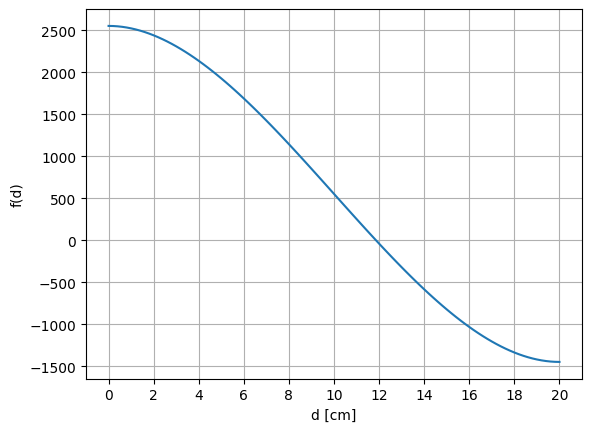

In [ ]:
# Importamos los módulos que necesitamos
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
r = 10
rho = 0.638

# La función f(d)
def f(d,r,rho):
  return 4*r**3*rho - 3*r*d**2 + d**3

# Partición de 100 puntos equiespaciados entre 0 y 2r
d = np.linspace(0,2*r,101)

# Gráfico
plt.plot(d,f(d,r,rho))
plt.xticks(np.arange(0, 21, 2))  # ticks del eje x (de 0 a 20, con paso 2)
plt.grid(True) # mostrar la cuadrícula
plt.xlabel('d [cm]') # leyenda en el eje x
plt.ylabel('f(d)') # leyenda en el eje y
plt.show()

Vemos en el gráfico que la gráfica corta el eje de las $d$ en un punto cercano a $d = 12$. Por lo tanto, $\stackrel{\;\land}{d} = 12 \text{ cm}$ es una primera aproximación a la solución del problema. En el caso que queramos una mejor aproximación debería realizar una nueva gráfica pero centrado más cerca de esta primera aproximación.

> #### Desafío 1 <a name = "Desafio.1"></a>
> Realice nuevos gráficos a partir del código brindado para obtener una mejor aproximación de la solución del problema.

Como habrán notado, esta forma de proceder, aunque divertida, resulta bastante impráctica. Ni mencionar que requiere de una persona que *observe* las diferentes gráficas para poder ir seleccionando adecuadamente los intervalos.

El objetivo de este capítulo es aprender sobre métodos que nos permitan encontrar soluciones a este tipo de ecuaciones donde no se pueda despejar la incógnita de una forma rápida y automática.

# 1.1 Métodos de punto fijo <a name = "sec:met.punto.fijo"></a>



Supongamos que queremos resolver una ecuación no lineal de la forma
$$f(p)=0.$$

Nos gustaría encontrar un método (algoritmo) que dada una aproximación $\stackrel{\,\land}{p}$ de la
solución $p$ nos devuelva una mejor aproximación $\stackrel{\;\sim}{p}$, es decir algo como
$$ |p\;-\stackrel{\;\sim}{p}\!|\le|p\;-\stackrel{\,\land}{p}\!|.
$$
Algo así como muestra la siguiente figura:


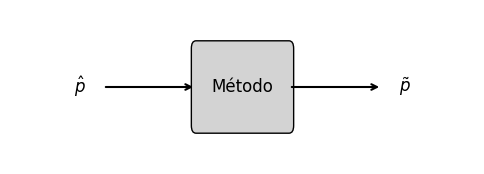

In [ ]:
# @title  {"vertical-output":true}
# @title  {"vertical-output":true,"display-mode":"form"}
#@title
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(6, 2))
ax.set_xlim(0, 10)
ax.set_ylim(1.5, 3.5)
ax.axis('off')  # Ocultar los ejes

# Dibujar la caja (Método)
box = FancyBboxPatch((4, 2), 2, 1, boxstyle="round,pad=0.1", edgecolor="black", facecolor="lightgray")
ax.add_patch(box)
ax.text(5, 2.5, "Método", ha="center", va="center", fontsize=12)

# Dibujar la flecha de entrada
ax.annotate("", xy=(4, 2.5), xytext=(2, 2.5), arrowprops=dict(arrowstyle="->", lw=1.5))
ax.text(1.5, 2.5, r"$\hat{p}$", fontsize=12, va="center", ha="center")

# Dibujar la flecha de salida
ax.annotate("", xy=(8, 2.5), xytext=(6, 2.5), arrowprops=dict(arrowstyle="->", lw=1.5))
ax.text(8.5, 2.5, r"$\tilde{p}$", fontsize=12, va="center", ha="center")

# Mostrar el diagrama
plt.show()


De esta forma podríamos iterar (repetir) su uso hasta obtener una aproximación tan
buena como deseemos.

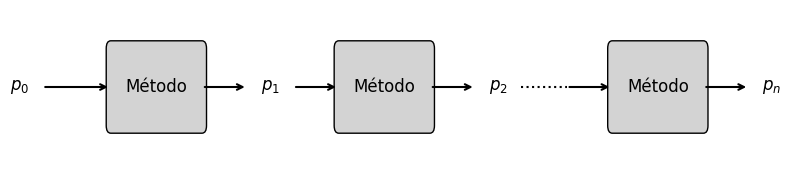

In [ ]:
# @title  {"vertical-output":true}
#@title
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlim(0, 17)
ax.set_ylim(1.5, 3.5)
ax.axis('off')  # Ocultar los ejes

# Dibujar la primera caja
box1 = FancyBboxPatch((2, 2), 2, 1, boxstyle="round,pad=0.1", edgecolor="black", facecolor="lightgray")
ax.add_patch(box1)
ax.text(3, 2.5, "Método", ha="center", va="center", fontsize=12)

# Primera flecha de entrada
ax.annotate("", xy=(2, 2.5), xytext=(0.5, 2.5), arrowprops=dict(arrowstyle="->", lw=1.5))
ax.text(0, 2.5, r"$p_0$", fontsize=12, va="center", ha="center")

# Primera flecha de salida
ax.annotate("", xy=(5, 2.5), xytext=(4, 2.5), arrowprops=dict(arrowstyle="->", lw=1.5))
ax.text(5.5, 2.5, r"$p_1$", fontsize=12, va="center", ha="center")


# Segunda caja (representa el último paso antes de p_n)
box2 = FancyBboxPatch((7, 2), 2, 1, boxstyle="round,pad=0.1", edgecolor="black", facecolor="lightgray")
ax.add_patch(box2)
ax.text(8, 2.5, "Método", ha="center", va="center", fontsize=12)

# Segunda flecha de entrada
ax.annotate("", xy=(7, 2.5), xytext=(6, 2.5), arrowprops=dict(arrowstyle="->", lw=1.5))

# Segunda flecha de salida
ax.annotate("", xy=(10, 2.5), xytext=(9, 2.5), arrowprops=dict(arrowstyle="->", lw=1.5))
ax.text(10.5, 2.5, r"$p_2$", fontsize=12, va="center", ha="center")

# Línea de puntos (procesos intermedios)
ax.plot([11, 12], [2.5, 2.5], linestyle="dotted", color="black", lw=1.5)

# Última caja (representa el último paso antes de p_n)
box2 = FancyBboxPatch((13, 2), 2, 1, boxstyle="round,pad=0.1", edgecolor="black", facecolor="lightgray")
ax.add_patch(box2)
ax.text(14, 2.5, "Método", ha="center", va="center", fontsize=12)

# Última flecha de entrada
ax.annotate("", xy=(13, 2.5), xytext=(12, 2.5), arrowprops=dict(arrowstyle="->", lw=1.5))

# Última flecha de salida
ax.annotate("", xy=(16, 2.5), xytext=(15, 2.5), arrowprops=dict(arrowstyle="->", lw=1.5))
ax.text(16.5, 2.5, r"$p_n$", fontsize=12, va="center", ha="center")

# Mostrar el diagrama
plt.show()


Obteniendo algo como
$$ |p\;-p_n|\le\ldots\le|p\;-p_2|\le|p\;-p_1|\le|p\;-p_0|
$$

> #### Desafío 2
> Se anima a describir algorítmicamente cuál fue el método que utilizó en el [Desafío 1](#Desafio.1).

El primer método que veremos es el *más simple* en el que podamos pensar. Éste consiste en aplicar reiteradamente una única **función real** $g:\mathbb{R}\to\mathbb{R} $ que, dada una aproximación $p_n$ nos dice cómo calcular $p_{n+1}$. Es decir, si comenzamos con una primera aproximación $p_0$, luego

  - $p_1 = g(p_0) $

  - $p_2 = g(p_1) $

  $\vdots$

  - $p_n = g(p_{n-1}) $

  - $p_{n+1} = g(p_n) $

  $\vdots$

Sin tener un problema en mente que resolver, primero veamos con algunos ejemplos cómo es que esto funcionaría.

### Ejemplo 1

Sea $g(x) = 1.2 x$ y $p_0 = 1$. Luego,

In [ ]:
p0 = 1

g = lambda x: 1.2*x

print("p0 =", p0)
p1 = g(p0)
print("p1 =", p1)
p2 = g(p1)
print("p2 =", p2)
p3 = g(p2)
print("p3 =", p3)
p4 = g(p3)
print("p4 =", p4)
p5 = g(p4)
print("p5 =", p5)


Los resultados parecen estar creciendo, pero ¿a dónde?

Analicemos formalmente un poco lo que está ocurriendo:

  - $p_1 = g(p_0) = 1.2 \times 1 = 1.2$
  - $p_2 = g(p_1) = 1.2 \times 1.2 = (1.2)^2$
  - $p_3 = g(p_2) = 1.2 \times (1.2)^2 = (1.2)^3$
  - $p_4 = g(p_3) = 1.2 \times (1.2)^3 = (1.2)^4$

  Es decir que

$$p_n = g(p_{n-1}) = (1.2)^n.$$

Ahora sí podemos asegurar que $p_n = (1.2)^n \to \infty$, cuando $n \to \infty $.

### Ejemplo 2
Sea $g(x) = 0.8 x$ y $p_0 = 33 $. Ahora con un poco más de práctica podemo ver rápidamente que

$$p_n = 33\times(0.8)^n.$$
En este caso $p_n\to 0$, cuando $n \to \infty $.

### Ejemplo 3
Consideremos $g(x) =\cos(x)$ y $p_0 = 1$, llevemos este ejemplo a la práctica escribiéndo un código que nos permita explorar mejor la situación:

In [ ]:
import numpy as np

p0 = 1
p = np.array([[p0]]) # array donde almacenaremos los datos

pasos = 50
p_n = p0

for i in range(1,pasos):
  p_n = np.cos(p_n)
  p=np.append(p,[[p_n]],axis =0)

print(p)

[[1.        ]
 [0.54030231]
 [0.85755322]
 [0.65428979]
 [0.79348036]
 [0.70136877]
 [0.76395968]
 [0.72210243]
 [0.75041776]
 [0.73140404]
 [0.74423735]
 [0.73560474]
 [0.74142509]
 [0.73750689]
 [0.74014734]
 [0.7383692 ]
 [0.7395672 ]
 [0.73876032]
 [0.73930389]
 [0.73893776]
 [0.7391844 ]
 [0.73901826]
 [0.73913018]
 [0.73905479]
 [0.73910557]
 [0.73907137]
 [0.73909441]
 [0.73907889]
 [0.73908934]
 [0.7390823 ]
 [0.73908704]
 [0.73908385]
 [0.739086  ]
 [0.73908455]
 [0.73908553]
 [0.73908487]
 [0.73908531]
 [0.73908501]
 [0.73908521]
 [0.73908508]
 [0.73908517]
 [0.73908511]
 [0.73908515]
 [0.73908512]
 [0.73908514]
 [0.73908513]
 [0.73908514]
 [0.73908513]
 [0.73908513]
 [0.73908513]]


Vemos que la iteración converge a $p = 0.73908513$.

Nos preguntamos entonces, ¿a qué converge una iteración de la forma $p_{n+1} = g(p_n)$?
Observemos nuevamente lo que quiere decir iteración de la forma $p_{n+1} = g(p_n)$:

  - $ p_1 = g(p_0) $

  - $ p_2 = g(p_1) $

  - ...

  - $ p_n = g(p_{n-1})$

  - $ p_{n+1} = g(p_n) $

  - $\downarrow \qquad \downarrow$

  - $ p = g(p) $

Vemos que si $p_n \to p$ entonces lo que está a la izquierda del signo igual converge a $p$.
Ahora bien, si $g$ es una función continua y $p_n → p$, entonces $g(p_n) \to g(p)$. Es decir, lo que está a la derecha del signo igual, converge a $g(p)$.

Por lo tanto, si la iteración $p_{n+1} = g(p_n)$ genera una sucesión convergente a $p$, resulta que
$$p = g(p).$$

De aquí surge la siguiente definición.

> ### Definición 1: Punto fijo
>
> Un punto fijo de una función $g$ es un número $p$ tal que $p = g(p)$.

Geométricamente, $p$ es un punto fijo si es la abscisa (y también la ordenada) de un punto intersección entre la gráfica de $y = x$ y la de $y = g(x)$.


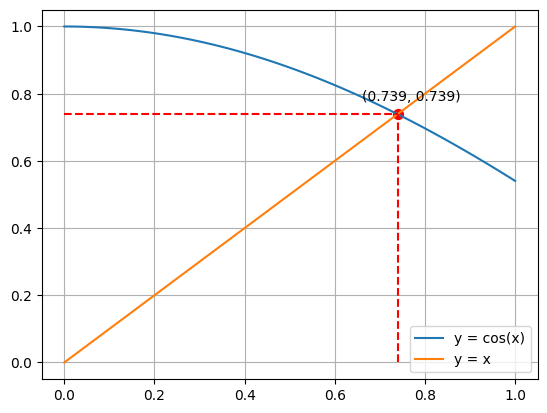

In [ ]:
# @title  {"vertical-output":true}
#@title
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 1, 101)
Y1 = np.cos(X)
Y2 = X
Sol_cos = 0.73908513

plt.plot(X, Y1, label='y = cos(x)')  # Añadimos etiquetas para la leyenda
plt.plot(X, Y2, label='y = x')

# Tomamos la solución calculada previamente
x_intersect, y_intersect = Sol_cos, Sol_cos

# Agregar líneas de extensión
plt.vlines(x_intersect, 0, y_intersect, linestyles='--', colors='red')
plt.hlines(y_intersect, 0, x_intersect, linestyles='--', colors='red')

# Marcar el punto de intersección
plt.scatter(x_intersect, y_intersect, color='red', marker='o', s=50)

# Añadir anotaciones (opcional)
plt.annotate(f'({x_intersect:.3f}, {y_intersect:.3f})',
             (x_intersect, y_intersect),
             textcoords="offset points",
             xytext=(10,10),
             ha='center')

plt.grid()
plt.legend() # Mostrar la leyenda
plt.show()

Lo que razonamos antes de esta definición es la demostración del siguiente teorema:

> ### Teorema 1 <a name = "teo:punto.fijo.v1"></a>
> Supongamos que g es una función continua y $\{p_n\}^{\infty}_{n=0}$ es una sucesión generada por la iteración de punto fijo (es decir $p_{n+1} = g(p_n)$). Si $p_n → p$ cuando $n → ∞$, entonces $p$ es un punto fijo de $g$, es decir $p = g(p)$.

El [Teorema 1](#teo:punto.fijo.v1) nos dice que el método de punto fijo con una función $g$
converge a un $p$ tal que $p = g(p)$. Entonces,
> ¿cómo podría esto ayudarnos a resolver una ecuación no lineal como $f(x)=0$?

La respeusta es obvia: si queremos resolver una ecuación por el método de punto fijo, debemos transformarla en una ecuación de la forma $$x = g(x).$$
Por ejemplo, si queremos resolver

$$x^4 + x - \sin(x) + \log(1 + x^2) = 8$$

debemos despejar un $x$. Hay muchas maneras de hacerlo. Una posible es la siguiente:

$$-x^4 + \sin(x) - \log(1 + x^2) + 8 = x$$


### Existencia de puntos fijos
Ahora nos preguntamos
>¿qué hace falta para poder asegurar que $g$ tiene un punto fijo en un intervalo $[a, b]$?

El teorema siguiente da una respuesta a esta pregunta.

> ### Teorema 2 <a name = "teo:cond.suf.existencia.pto.fijo"></a>
> Sea $g : [a, b] → R$ una función continua.
>
> 1. Si $g(a) ≥ a$ y $g(b) ≤ b$, entonces $g$ tiene un punto fijo en $[a, b]$.
> 2. Si $g(a) ≤ a$ y $g(b) ≥ b$, entonces $g$ tiene un punto fijo en $[a, b]$.

> #### Demostración
Definimos $f(x) = g(x) − x$. Como $g$ es continua, $f$ también es continua.
>
> Veamos la demostración de $(i)$, la de $(ii)$ es análoga.
> Como $g(a) ≥ a$ tenemos que $f(a) ≥ 0$.
>
> Como $g(b) ≤ b$ tenemos que $f(b) ≤ 0$.
> Luego, por el teorema del valor intermedio para funciones continuas, resulta que existe $p ∈ [a, b]$ tal que $f(p) = 0$, es decir, $g(p) − p = 0$, o lo que es lo mismo, $g(p) = p$. Es decir, $p$ es un punto fijo de $g$ en $[a, b]$.


##Ejemplo 3
Consideremos ahora la función $g(x) = e^{-x}$ en el intervalo $[0, 1]$.

¿Tiene un punto fijo?

Sí, pues cumple las hipótesis del [Teorema 2](#teo:cond.suf.existencia.pto.fijo), ya que
$$g(0) = 1 > 0 \quad \text{ y }\quad g(1) = e^{-1} ≈ 0.3679 < 1.$$

Veamos qué ocurre al iterar $p_{n+1} = e^{-p_n}$ comenzando con $p_0 = 0.1$.

In [ ]:
import numpy as np

p0 = 0.1
g = lambda x: np.exp(-x)
p = np.array([[p0]]) # array donde almacenaremos los datos


pasos = 30
p_n = p0

for i in range(1,pasos):
  p_n = g(p_n)
  p=np.append(p,[[p_n]],axis =0)

print(p)

[[0.1       ]
 [0.90483742]
 [0.40460766]
 [0.66723854]
 [0.51312359]
 [0.5986228 ]
 [0.54956798]
 [0.57719912]
 [0.56146877]
 [0.5703707 ]
 [0.56531584]
 [0.56818067]
 [0.56655525]
 [0.56747689]
 [0.56695412]
 [0.56725059]
 [0.56708244]
 [0.5671778 ]
 [0.56712372]
 [0.56715439]
 [0.56713699]
 [0.56714686]
 [0.56714127]
 [0.56714444]
 [0.56714264]
 [0.56714366]
 [0.56714308]
 [0.56714341]
 [0.56714322]
 [0.56714333]]


Parece converger a algo próximo a 0.56714. Veamos cómo luce esto

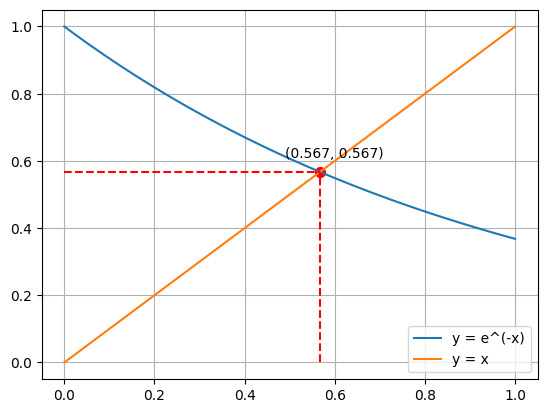

In [ ]:
# @title  {"vertical-output":true}
# @title
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 1, 101)
Y1 = np.exp(-X)
Y2 = X
Sol_exp = 0.56714333

plt.plot(X, Y1, label='y = e^(-x)')  # Añadimos etiquetas para la leyenda
plt.plot(X, Y2, label='y = x')

# Tomamos la solución calculada previamente
x_intersect, y_intersect = Sol_exp, Sol_exp

# Agregar líneas de extensión
plt.vlines(x_intersect, 0, y_intersect, linestyles='--', colors='red')
plt.hlines(y_intersect, 0, x_intersect, linestyles='--', colors='red')

# Marcar el punto de intersección
plt.scatter(x_intersect, y_intersect, color='red', marker='o', s=50)

# Añadir anotaciones (opcional)
plt.annotate(f'({x_intersect:.3f}, {y_intersect:.3f})',
             (x_intersect, y_intersect),
             textcoords="offset points",
             xytext=(10,10),
             ha='center')

plt.grid()
plt.legend() # Mostrar la leyenda
plt.show()

### Ejemplo 4
Consideremos la función $g(t) = t^5 + t^2 - t^3 - 1$ en el intervalo $[0, 2]$.

¿Tiene un punto fijo en ese intervalo?

Sí, pues $g(0) = -1 < 0$ y $g(2) = 27 > 2$.

Veamos qué ocurre al iterar $$p_{n+1} = p^5_n + p^2_n - p^3_n - 1$$ comenzando con $p_0 = 1$.

In [ ]:
import numpy as np

p0 = np.array([1])
g = lambda x: x**5 + x**2 - x**3 - 1
p = np.array([p0]) # array donde almacenaremos los datos

pasos = 25
p_n = p0

for i in range(1,pasos):
  p_n = g(p_n)
  p=np.append(p,[p_n],axis =0)

print(p)

[[ 1]
 [ 0]
 [-1]
 [ 0]
 [-1]
 [ 0]
 [-1]
 [ 0]
 [-1]
 [ 0]
 [-1]
 [ 0]
 [-1]
 [ 0]
 [-1]
 [ 0]
 [-1]
 [ 0]
 [-1]
 [ 0]
 [-1]
 [ 0]
 [-1]
 [ 0]
 [-1]]


Vemos que en este ejemplo no converge. Podríamos pensar que el problema reside en que escogimos $p_0$ inadecuadamente. Pero pueden comprobar por ustedes mismos que aún para otros valores de $p_0 ∈ (0,2)$, no va a haber convergencia.

> ### Conclusión importante
> La iteración de punto fijo *no siempre converge*, aunque haya un punto fijo. El teorema que vimos dice que
>> *si la iteración converge, entonces lo hace a un punto fijo.*

Nos preguntamos ahora, ¿en qué casos podemos asegurar que la iteración de punto
fijo sí converge?


Analicemos los siguientes casos gráficamente:


In [ ]:
# Parámetros iniciales
p0 = 0.4  # Punto inicial
n_iterations = 10  # Número de iteraciones

In [ ]:
# @title  {"vertical-output":true}
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Definir la función g(x)
def g(x):
    return np.cos(x)  # Puedes cambiar esta función por otra

# Definir el rango de valores
x = np.linspace(0, 1.5, 500)


frames_per_iteration = 2  # Un frame para línea vertical, otro para horizontal

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(x, g(x), label=r"$g(x)$", color="blue")
ax.plot(x, x, label=r"$f(x) = x$", color="red", linestyle="--")
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.grid()

# Agregar texto y elementos animables
iteration_text = ax.text(0.2, 1.3, "", fontsize=12)
point, = ax.plot([], [], "o", color="black")  # Punto de iteración

# Listas globales para puntos y líneas
points_x = [p0]  # Inicializar con el valor inicial
points_y = [g(p0)]  # Altura inicial
lines = []  # Lista para almacenar las líneas

# Función de actualización para la animación
def update(frame):
    global points_x, points_y, lines

    iteration = frame // frames_per_iteration  # Iteración actual
    step = frame % frames_per_iteration  # Paso dentro de la iteración (0 o 1)

    if iteration >= n_iterations:
        return []  # No hacer nada si ya terminamos las iteraciones

    # Paso inicial: subir del eje x a la función g(x)
    if iteration == 0 and step == 0:
        vertical_line = ax.plot(
            [points_x[0], points_x[0]],
            [0, points_y[0]],
            color="green",
            lw=1.5,
            animated=True
        )[0]
        lines.append(vertical_line)

    elif step == 0:  # Línea vertical (ir a g(x))
        new_x = points_x[-1]
        new_y = g(points_x[-1])
        vertical_line = ax.plot(
            [new_x, new_x],
            [points_y[-1], new_y],
            color="green",
            lw=1.5,
            animated=True
        )[0]
        points_y.append(new_y)
        lines.append(vertical_line)

    elif step == 1:  # Línea horizontal (ir a y = x)
        new_x = points_y[-1]
        horizontal_line = ax.plot(
            [points_x[-1], new_x],
            [points_y[-1], points_y[-1]],
            color="green",
            lw=1.5,
            animated=True
        )[0]
        points_x.append(new_x)
        lines.append(horizontal_line)

    # Actualizar el punto actual
    point.set_data([points_x[-1]], [points_y[-1]])

    # Actualizar texto de iteración
    iteration_text.set_text(f"Iteración: {iteration}")
    return [point, iteration_text] + lines

# Crear la animación
total_frames = n_iterations * frames_per_iteration + 1  # Incluye el paso inicial
ani = FuncAnimation(fig, update, frames=total_frames, interval=800, blit=True)

# Mostrar en un notebook (si estás en Jupyter)
from IPython.display import HTML
plt.close(fig)  # Cerrar la figura para evitar la gráfica estática
HTML(ani.to_jshtml())

In [ ]:
# Parámetros iniciales
p0 = 1.1  # Punto inicial
n_iterations = 10  # Número de iteraciones

In [ ]:
# @title  {"vertical-output":true}
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Definir la función g(x)
def g(x):
    return np.exp(x) - 2 # Puedes cambiar esta función por otra

# Definir el rango de valores
x = np.linspace(-2, 3, 500)

frames_per_iteration = 2  # Un frame para línea vertical, otro para horizontal

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(x, g(x), label=r"$g(x)$", color="blue")
ax.plot(x, x, label=r"$f(x) = x$", color="red", linestyle="--")
ax.set_xlim(-1, 3)
ax.set_ylim(-2, 4)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
ax.grid()

# Agregar texto y elementos animables
iteration_text = ax.text(0.2, 1.3, "", fontsize=12)
point, = ax.plot([], [], "o", color="black")  # Punto de iteración

# Listas globales para puntos y líneas
points_x = [p0]  # Inicializar con el valor inicial
points_y = [g(p0)]  # Altura inicial
lines = []  # Lista para almacenar las líneas

# Función de actualización para la animación
def update(frame):
    global points_x, points_y, lines

    iteration = frame // frames_per_iteration  # Iteración actual
    step = frame % frames_per_iteration  # Paso dentro de la iteración (0 o 1)

    if iteration >= n_iterations:
        return []  # No hacer nada si ya terminamos las iteraciones

    # Paso inicial: subir del eje x a la función g(x)
    if iteration == 0 and step == 0:
        vertical_line = ax.plot(
            [points_x[0], points_x[0]],
            [0, points_y[0]],
            color="green",
            lw=1.5,
            animated=True
        )[0]
        lines.append(vertical_line)

    elif step == 0:  # Línea vertical (ir a g(x))
        new_x = points_x[-1]
        new_y = g(points_x[-1])
        vertical_line = ax.plot(
            [new_x, new_x],
            [points_y[-1], new_y],
            color="green",
            lw=1.5,
            animated=True
        )[0]
        points_y.append(new_y)
        lines.append(vertical_line)

    elif step == 1:  # Línea horizontal (ir a y = x)
        new_x = points_y[-1]
        horizontal_line = ax.plot(
            [points_x[-1], new_x],
            [points_y[-1], points_y[-1]],
            color="green",
            lw=1.5,
            animated=True
        )[0]
        points_x.append(new_x)
        lines.append(horizontal_line)

    # Actualizar el punto actual
    point.set_data([points_x[-1]], [points_y[-1]])

    # Actualizar texto de iteración
    iteration_text.set_text(f"Iteración: {iteration}")
    return [point, iteration_text] + lines

# Crear la animación
total_frames = n_iterations * frames_per_iteration + 1  # Incluye el paso inicial
ani = FuncAnimation(fig, update, frames=total_frames, interval=800, blit=True)

# Mostrar en un notebook (si estás en Jupyter)
from IPython.display import HTML
plt.close(fig)  # Cerrar la figura para evitar la gráfica estática
HTML(ani.to_jshtml())

En base a estos ejemplos vemos que la convergencia tiene que ver con la forma en que la función *corte* a la identidad $y=x$. Más formalmente, el valor de la derivada de $g$ cerca del punto fijo. El siguiente teorema precisa esta idea.

> ### Teorema 3 (Teorema del punto fijo)<a name = "teo:punto.fijo.v2"></a>
> Si g es $C^1$ en un entorno $(p - δ, p - δ)$ de un punto fijo $p$ de $g$ y $|g'(x)| ≤ K < 1$, para todo $x ∈ [p − δ, p + δ]$.
>
>Entonces, comenzando con $p_0 ∈ [p - δ, p + δ]$, la iteración de punto fijo $p_{n+1} = g(p_n)$ genera una sucesión $\{p_n\}$ que tiende a $p$.

Para demostrar este teorema, utilizaremos el teorema del valor medio:

> ### Teorema del valor medio <a name = "teo:valor.medio"></a>
> Si $g$ es continua en $[a, b]$ y derivable en $(a, b)$, entonces
existe $z ∈ (a, b)$ tal que
$$ g(b)-g(a) = g'(z)(b-a).$$


> #### Demostración del [Teorema 3](#teo:punto.fijo.v2).
Si $p_0 ∈ [p − δ, p + δ]$, entonces $|p - p_0| ≤ δ$. Ahora bien,
por el [teorema del valor medio](#teo:valor.medio), existe $z_1$ entre $p$ y $p_0$ tal que
$$p - p_1 = g(p) - g(p_0) = g'(z_1)(p - p_0),$$
luego
$$|p - p_1| = |g(p) - g(p_0)| = |g'(z_1)| |p - p_0| ≤ K|p - p_0| ≤ Kδ< δ,$$
y por lo tanto $p_1$ ∈ $[p − δ, p + δ]$. De la misma manera, $p_2, p_3, · · · ∈ [p − δ, p + δ]$.<br>
Además, por ese razonamiento, vemos que
$$|p - p_1| \le K|p - p_0|,$$
y de la misma manera
$$|p - p_2| ≤ K|p - p_1|$$
$$|p - p_3| ≤ K|p - p_2|$$
$$\vdots$$
$$|p - p_n| ≤ K|p - p_{n-1}|$$
Juntando estas estimaciones obtenemos
$$|p - p_2| ≤ K|p - p_1| ≤ K K|p - p_0| = K^2 |p - p_0|$$
$$|p - p_3| ≤ K|p - p_2| ≤ K K^2 |p - p_0| = K^3 |p - p_0|$$
y en general
$$|p - p_n| ≤ K^n |p - p_0|$$
Como $0 ≤ K < 1$, resulta que $K^n → 0$ cuando $n → ∞$ y entonces $|p - p_n| → 0$.

En los libros de cálculo numérico suele aparecer esta otra versión del teorema del punto fijo.

> ### Teorema 4 (Punto fijo, otra versión).
> Sea $g$ una función $C^1$ en un intervalo $[a, b]$ que cumple $g(x) ∈ [a, b]$, para todo $x ∈ [a, b]$. Si existe $C < 1$ tal que $|g'(x)| ≤ K$ para todo $x ∈ [a, b]$, entonces:
*   Existe un único punto fijo $p$ en ese intervalo.
*   Comenzando a partir de cualquier $p_0 ∈ [a, b]$, la iteración de punto fijo $p_{n+1} = g(p_n)$ converge $p$ y más áun,<a name = "eq:punto.fijo.v2"></a>
$$|p - p_n| ≤ K^n |p - p_0|. \qquad(1.1)$$

La demostración es similar a la del teorema anterior, y por ello no la escribimos aquí. Vale la pena destacar que la acotación [(1.1)](#eq:punto.fijo.v2) sirve para entender la velocidad de convergencia del método e incluso determinar cuántas iteraciones hacen falta para tener un error absoluto menor que cierta tolerancia.

Observemos que en general $p$ se desconoce, y sólo se sabe que está en el intervalo $[a, b]$. Por otro lado, $p_0$ sí se conoce, pues es un número inicial que nosotros proponemos. Como ambos están en $[a, b]$ concluimos que

$$|p - p_0| ≤ |b - a|.$$

De esta manera, la acotación [(1.1)](#eq:punto.fijo.v2) resulta
$$|p - p_n| ≤ K^n |b - a|.$$

Conociendo $|b-a|$ y $C$, podemos determinar el valor de $n$ para el que se podrá garantizar que $|p - p_n| < ε$.

Se deja como ejercicio identificar qué debe cumplir $n$ en algunos ejemplos. Al momento de realizar esos ejercicios, tenga en cuenta que $0 < K < 1$ y luego $\log(K) < 0$.



### Criterio de parada
Aunque la observación anterior permite calcular cuántas iteraciones harían falta para lograr un cierto error absoluto, lo usual es detener las iteraciones de otra manera. Observemos lo siguiente:

\begin{align*}
p - p_n &= p - p_{n+1} + p_{n+1} - p_n \\
&= g(p) - g(p_n) +  p_{n+1} - p_n \\
&= g'(z_n) \big(p - p_n \big) + p_{n+1} - p_n
\end{align*}

para algún número $z_n$ entre $p$ y $p_n$. Luego

$$
p - p_n  - g'(z_n) \big(p - p_n \big) = p_{n+1} - p_n .
$$

Es decir

$$
\big(1-g'(z_n)\big) \big(p - p_n \big) = p_{n+1} - p_n ,
$$

que implica

$$
 \big(p - p_n \big) = \frac{1}{1-g'(z_n)}\big(p_{n+1} - p_n \big).
$$

Como $p-p_{n+1} = g(p) - g(p_n) = g'(z_n) \big(p - p_n\big)$ resulta

$$
p-p_{n+1} = \frac{g'(z_n)}{1-g'(z_n)}\big(p_{n+1} - p_n \big)
\approx \frac{g'(p)}{1-g'(p)}\big(p_{n+1} - p_n \big).
$$

Si $|g'(p)| \le 1/2$ resulta $$\left|\dfrac{g'(p)}{1-g'(p)}\right| \le 1$$ y luego
<a name = "eq:1.2"></a>

$$
| p - p_{n+1} | \le |p_{n+1} - p_n|. \qquad (1.2)
$$

En base a esta observación, si se quiere calcular una aproximación de $p$ con un error absoluto menor a $\texttt{tol}$, se detienen las iteraciones del método de punto fijo cuando
$$|p_{n+1} - p_n| < \texttt{tol}.$$

### Implementación del método

A continuación mostramos una (posible) implementación del método de punto fijo:

In [ ]:
def puntofijo(g, p0, tol, max_iter):
  """
  función para resolver la ecuación de la forma
  x = g(x) mediante el método de punto fijo.
  """

  p = g(p0)
  contador = 1

  while np.abs(p-p0)>tol and contador<max_iter:
    p0 = p
    p = g(p0)
    contador += 1

  if np.abs(p-p0)>tol:
    print("Se alcanzó el nro maximo de iteraciones")
  return p,contador

Es importante notar que no se almacenan todas las iteraciones sino las últimas dos.
La última en la variable `p` y la anterior a la última en `p_0`. El algoritmo se detiene entonces cuando $|p-p_0| ≤$ `tol` . Para asegurarnos que esto ocurra, lo que está dentro del bloque `while` se ejecuta mientras $|p-p_0| >$ `tol`.

El control por el *número máximo de iteraciones* `max_iter` se realiza porque puede ocurrir que estemos ante un caso en que el método de punto fijo **no converge**, y entonces hacemos que finalice cuando se supera este número.

Al finalizar el bloque `while`, hay un bloque `if`. Este bloque pregunta: si $|p-p_0| >$ `tol`, eso quiere decir que el `while` terminó porque se alcanzó el número máximo de iteraciones.
En ese caso se informa "Se alcanzo el nro maximo de iteraciones". En caso contrario (`else`) quiere decir que el bloque `while` finalizó porque se alcanzó la tolerancia deseada, es decir no se cumple más que $|p-p_0| >$ `tol`, luego $|p-p_0| \le$ `tol` , que equivale a $|p_{n+1} - p_n|≤$ `tol`.

### Ejemplo

Pongamos en funcionamiento nuestra función `puntofijo` para encontrar la solución a
$$x = \frac{\cos(x)}{2}$$
partiendo de un $p_0 = 1$ con una tolerancia de $10^{-6}$ considerando como máximo 1000 iteraciones.

In [ ]:
g = lambda x: np.cos(x)/2

p,contador = puntofijo(g, 1, 1e-6, 100)
print("p =", p, "\n")
print("Se alcanzó en", contador, "iteraciones \n")

p = 0.4501837745305894 

Se alcanzó en 10 iteraciones 



> ### Observación importante
> Note que la hipótesis $|g'(p)| ≤ 1/2$ no siempre será satisfecha y por esto nuestro criterio de parada $|p_{n+1} - p_n| ≤$ `tol` no siempre asegurará que el **verdadero** error satisfaga que $|p - p_{n+1}|≤$ `tol`.

## Pongámonos a prueba!!! 🤓
Intentá hayar la solución a los siguientes problemas con los conocimientos adquiridos en esta sección.
Recordá que si bien estás buscando un resultado en particular, herramientas como gráficas u otros cálculos auxiliares pueden ser de mucha ayuda para llegar a este.
Podés resolver utilizando celdas de código en este mismo colab, o corriendo python de manera local.



```
# Esto tiene formato de código
```

### Ejercicio Punto Fijo 1



Considere la ecuación $8 sen(x)e^{−x} - 1 = 0$.

(a) Determine gráficamente cuántas soluciones positivas tiene la ecuación y de un valor aproximado para cada una de ellas.

(b) Reescriba la ecuación en la forma $x = g_1(x)$ para poder utilizar un método de punto fijo.

(c) Determine a cuál o cuáles de las soluciones converge la iteración del punto fijo $x_{n+1} = g_1(x_n)$. En caso de convergencia, calcule las mismas con 8 dígitos correctos y reporte cuántas iteraciones fueron necesarias en cada caso.

(d) Grafique la función $g'_1$ en un intervalo adecuado para mostrar que la convergencia o no convergencia a cada uno de los puntos fijos se condice con la teoría.

(e) En caso de no haber podido hallar todas las soluciones de la ecuación utilizando $g_1$, reescriba la ecuación de otra manera $x = g_2(x)$ y repita los pasos de los dos items anteriores.

### Ejercicio Punto Fijo 2


La función $g(x) = \frac{\left(2 + sen(2x)\right)^2}{8\left(1 + cos^2(x)\right)}$ tiene un único punto fijo $p$ en el intervalo $[0, 1]$.

(a) Determinar, a partir del gráfico de su derivada $g'(x)$, un valor de $K$ tal que $|g'(x)| ≤ K$ para todo $x ∈ [0, 1]$.

(b) Si comenzáramos con $p_0 = 0.5$ e iteráramos con la fórmula $p_{n+1} = g(p_n)$. Determinar teóricamente cuántas iteraciones harían falta para garantizar una aproximación del punto fijo $p$ con un error absoluto menor a
$10^{-12}$.

(c) Utilice la función de punto fijo para obtener $p$ con error absoluto menor a $10^{-12}$, empezando desde $p_0 = 0.5$.
Compare lo obtenido con la estimación teórica del inciso anterior. Explique por qué no se contradicen estos resultados.

### Ejercicio Punto Fijo 3


Consideremos la ecuación
$$x^4 + 2x^2 - x - 3 = 0.$$

(a) Verificar que $\alpha ∈ [1,\frac{3}{2}]$ es solución de esa ecuación si y solo si $\alpha = g_i(\alpha)$ para cada una de las funciones $g_i(x)$ siguientes. Es decir, $\alpha ∈ [1,\frac{3}{2}]$ es solución de esa ecuación si y solo si $\alpha$ es un punto fijo de $g_i$.

$$g_1(x) = (3 + x − 2x^2)^{\frac{1}{4}}$$

$$g_2(x) = \left(\frac{x + 3 − x^4}{2}\right)^{\frac{1}{2}}$$

$$g_3(x) = \left(\frac{x + 3}{x^2 + 2}\right)^{\frac{1}{2}}$$

$$g_4(x) = \frac{3x^4 + 2x^2 + 3}{4x^3 + 4x - 1}$$

(b) Verificar en Octave con cuáles de ellas el método de punto fijo converge o no comenzando de $p_0 = 1$. Además, determine con cuál de ellas se obtiene una convergencia más rápida a la solución.

(c) Mirando el gráfico de $|g'_i(x)|$ en el intervalo $[1,\frac{3}{2}]$, corrobore si lo observado experimentalmente coincide con lo esperado desde el punto de vista teórico.

# 1.2 El método de bisección <a name = "sec:met.biseccion"></a>

En esta sección veremos el método de bisección, que se utiliza para resolver ecuaciones de una incógnita.

Toda ecuación de una incógnita puede escribirse como<a name = "eq:f.de.x.igual.a.cero"></a>

$$
f(x) = 0. \qquad (1.2)
$$

Si $p$ es un número tal que $f(p) = 0$ se dice que $p$ es un \emph{cero} de $f$ o que $p$ es una raíz de la ecuación [(1.2)](#eq:f.de.x.igual.a.cero).

Antes de ver el método, recordamos el teorema del valor intermedio, que es la base que da la idea al método de bisección.

> ### Teorema del valor intermedio
> Si $f: [a, b] → \mathbb{R}$ es una función continua y $d$ es un número que está entre $f(a)$ y $f{(b)}$ entonces existe un punto $c$ en el intervalo $[a, b]$ tal que $f(c) = d$.

Un corolario inmediato de este teorema es el conocido como *lema de Bolzano* que dice lo siguiente:

> ### Lema de Bolzano
> Si $f : [a, b] → \mathbb{R}$ es una función continua y $f(a)$ y $f(b)$ tienen signo
opuesto $(f(a) · f(b) < 0)$, entonces existe $p ∈ [a, b]$ tal que $f(p) = 0$.

La idea del método de bisección es comenzar con un intervalo $[a,b]$ tal que $f(a)$ y $f(b)$ tienen signo opuesto, es decir, tenemos localizada una raíz en el intervalo $[a,b]$.

Luego, ir reduciendo sistemáticamente la longitud del intervalo donde estamos seguros que hay una raíz, hasta que tengamos una tolerancia aceptable, es decir, un intervalo tan pequeño donde se encuentra la raíz que es satisfactorio para el problema en cuestión.

La manera de subdividir el intervalo consiste en tomar el punto medio del intervalo

$$
m = \frac{a+b}{2}$$

y luego analizar las tres posibilidades que pueden darse

1.   Si $f(a)$ y $f(m)$ tienen signos opuestos, entonces hay un cero en $[a, m]$.
2.   Si $f(m)$ y $f(b)$ tienen signos opuestos, entonces hay un cero en $[m, b]$.
3.   Si $f(m) = 0$, entonces $m$ es la solución buscada.

Si ocurre el caso (3), hemos encontrado la raíz (debemos aclarar que esto no se da *casi nunca*, pero puede ocurrir).

Si ocurre el caso (1) o el caso (2), entonces hemos encontrado un intervalo cuyo ancho es la mitad que el original y contiene una raíz. Para continuar el proceso, renombramos el nuevo intervalo más pequeño como $[a, b]$ y repetimos el procedimiento hasta que el intervalo sea tan pequeño como deseamos. Puesto que el proceso de bisección genera una sucesión de intervalos encajados, con sus correspondientes puntos medios, usaremos la siguiente notación para tener un registro de los detalles del proceso:


### Método de bisección
*   $[a_0, b_0]$ es el intervalo de partida y $m_0 = \dfrac{a_0 + b_0}{2}$ es su punto medio.
*   $[a_1, b_1]$ es el segundo intervalo (coincide con $[a_0, m_0]$ o con $[m_0, b_0]$) y $m_1$ es su punto medio. El intervalo $[a_1, b_1]$ es la mitad de ancho que $[a_0, b_0]$.
*   ...
*   Después de llegar al intervalo $[a_n, b_n]$, en el que también se localiza un cero, y cuyo punto medio es $m_n$, se construye el intervalo $[a_{n+1}, b_{n+1}],$ en el que también hay un cero y mide la mitad de $[a_n, b_n]$.



A partir de este procedimiento resulta que

$$a_0 ≤ a_1 ≤ · · · ≤ a_n ≤ · · · ≤ b_n ≤ · · · ≤ b_1 ≤ b_0.$$

Además, hay una raíz $p$ que satisface $a_n ≤ p ≤ b_n$.

Es importante que nos detengamos un momento a pensar cómo se define el intervalo
$[a_{n+1}, b_{n+1}]$ a partir del $[a_n, b_n]$:



*   Definimos $m_n = \dfrac{a_n + b_n}{2}$.
*   Si $f(a_n) · f(m_n) < 0$ (entonces hay una raíz en el intervalo $[a_n, m_n]$).
    *   Definimos $[a_{n+1}, b_{n+1}] = [a_n, m_n]$ (es decir, $a_{n+1} = a_n$ y $b_{n+1} = m_n$).
*   Si no, (entonces ocurre que $f(m_n) · f(b_n) < 0$).
    *   Definimos $[a_{n+1}, b_{n+1}] = [m_n, b_n]$ (es decir, $a_{n+1} = m_n$ y $b_{n+1} = b_n$).
*   Si no ocurre ninguna de las anteriores, resulta $f(m_n) = 0$. Entonces $m_n$ es la solución. FIN.





Observamos que con este procedimiento, en cada paso, la longitud del intervalo se reduce a la mitad, es decir

$$|b_{n+1} - a_{n+1}| = \frac{|b_n - a_n|}{2}.$$

Por lo tanto, después de n pasos, la longitud del intervalo es

$$|b_n - a_n| = \frac{|b_0 - a_0|}{2^n} = \left(\frac{1}{2}\right)^n |b_0 - a_0|.$$

Como $m_n$ está en el centro del intervalo $[a_n, b_n]$ resulta que la distancia a la raíz $p$ es menor o igual a la mitad de la longitud del intervalo $[a_n, b_n]$, es decir

$$|p - m_n| ≤ \frac{|b_n - a_n|}{2} = \left(\frac{1}{2}\right)^{n+1} |b_0 - a_0|.$$

Resumimos todo lo analizado hasta ahora en el siguiente teorema.

> ### Teorema 3 (Convergencia del método de bisección).
> Supongamos que $f : [a, b] → R$ es continua y que $f(a)$ y $f(b)$ tienen signos distintos. Sea $\{m_n\}_{n≥0}$ la sucesión de puntos medios de los intervalos generados por el método de bisección.
Entonces existe una raíz $p$ de la ecuación $f(x) = 0$ (es decir, $f(p) = 0$) en $[a, b]$ tal que $m_n → p$, cuando $n → ∞$ y además
$$|p - m_n | \le \left(\frac12\right)^{n+1} |b-a|, \qquad n=0,1,2,\dots.$$

Finalizamos esta sección mostrando una implementación del método de bisección, para resolver la ecuación

$$x\sin(x) = 1$$

en el intervalo $[0, 2]$. Comenzamos reescribiendo la ecuación como

$$x\sin(x) - 1 = 0.$$

es decir, $f(x) = x \sin(x)-1$.

Notemos que $f(0)=-1 < 0$ y $f(2)=2\sin(2)-1 \approx 0.81859 > 0$.

Por lo tanto, hay una solución en el intervalo $[0,2]$ a la que convergerá el método de bisección.


In [ ]:
f = lambda x: x * np.sin(x) - 1

# Intervalo inicial
a, b = 0, 2

# Parámetros
tol = 1e-12
max_iter = 1000

# Inicializamos contador, error y punto medio del intervalo
contador = 1
I = np.abs(b-a)/2
m = (a+b)/2

while (I > tol and contador < max_iter):
  if f(a)*f(m) < 0:
    b = m
  elif f(m)*f(b) < 0:
    a = m
  else: #(f(m) = 0)
    break

  contador += 1
  I = I/2
  m = a + I #Equivalente a (a+b)/2

if (contador == max_iter):
  print("Se alcanzo el nro maximo de iteraciones")
else:
  print("La solucion es", m)

La solucion es 1.1141571408725213


El código del método de bisección presentado es lo que se conoce como un
script. Es muy útil programar algunas resoluciones como scripts, pero conviene programar algunas como funciones. Cuando programemos un método de resolución de
algún problema, que puede ser utilizado para muchos otros problemas, lo haremos usando funciones. Estas permiten la reutilización sin necesidad de cambiar nombres de variables, y las variables que se usan dentro de las funciones no afectan a las ya existentes.
A continuación mostramos cómo se modifica el código anterior para transformarlo en una función, empleando el comando `def`.


In [ ]:
def bisec(f, a, b, tol = 1e-6, max_iter = 1000):
  """
  función para resolver una ecuación de la forma
  f(x) = 0 mediante el método de bisección,
  donde x es una raiz dentro del intervalo [a,b].

  f(a)f(b) debe ser < 0
  """

  if f(a) * f(b) > 0:
    print("f(a) y f(b) tienen el mismo signo!!!!!!")

  contador = 1
  I = (b-a)/2
  m = (a+b)/2

  while I > tol and contador < max_iter:
    if f(a) * f(m) < 0:
      b = m
    elif f(m) * f(b) < 0:
      a = m
    else:
      break

    contador += 1
    I = I/2
    m = a + I

  if contador == max_iter:
    print("Se alcanzó el nro maximo de iteraciones")

  return m

Probemos la función con la ecuación anterior


In [ ]:
bisec(lambda x: x * np.sin(x) - 1,0,2,1e-8,100)

1.114157147705555

Vale la pena hacer algunas aclaraciones.

* La primera línea dice:
```python
    def bisec(f, a, b, tol = 1e-6, max_iter = 1000)
```
Esto quiere decir que bisec es una función que toma 5 valores como argumento, y en caso de no especificarse los ultimos dos, tomará 1e-6 y 1000 como valor por defecto, respectivamente.
*   Las primeras líneas que están entre `"""` constituyen el help de la función. Así, ocurre lo siguiente:
```python
    help(bisec):

    Help on function bisec in module __main__:

    bisec(f, a, b, tol=1e-06, max_iter=1000)
    función para resolver una ecuación de la forma
    f(x) = 0 mediante el método de bisección,
    donde x es una raiz dentro del intervalo [a,b].

    f(a)f(b) debe ser < 0
```
*   La última línea dice:
```python
    return m
```
Acá indicamos que como resultado de ejecutar la función, está devolverá el valor de m. Si al implementarlar colocamos
```python
   var = bisec(f,...)
```
el valor de m retornado se guardará como valor de la variable global `var`.
*   Una diferencia importante entre las funciones y los scripts es que en las funciones las variables son locales. Esto quiere decir que no interfieren con las variables que tengamos definidas. Por ejemplo, observemos lo que ocurre con las siguientes líneas:


Observamos que aunque dentro de la función `bisec` la variable `f` y la  variable `I` toman otros valores, estos no afectan a nuestras variables `f` e `I`. Más aún, la variable `m` toma el valor `0.739085130393505` dentro de la función `bisec` (al finalizar), pero ese valor se olvida al finalizar la ejecución de `bisec`.

Volvamos ahora al [Ejemplo de la esfera que se hunde](#ejem:esfera.que.se.hunde). Una manera de resolver el
problema es mediante un script que a su vez llama a la función `bisec`.

La esfera de radio 10 cm y densidad 0.638 g/cm3 

se hunde 11.861501513049006 cm 



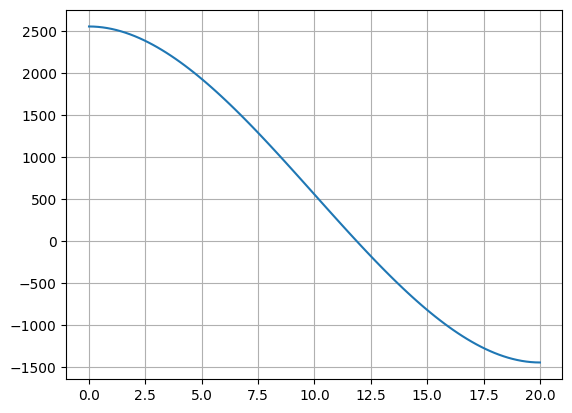

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r = 10
rho = 0.638;

def f(d):
  return 4*r**3*rho - d**2*3*r + d**3

x = np.linspace(0,2*r,100)
y = f(x)

plt.plot(x,y,"-")
plt.grid()
#Resolvemos
p = bisec(f,0,2*r,1e-8,1000);
print("La esfera de radio",r,"cm y densidad", rho,"g/cm3 \n");
print("se hunde", p, "cm \n");


Notemos que la función `f` se define en términos de `d` en lugar de `x`, pues así lo hicimos cuando estudiamos el ejemplo al principio del capítulo. Esto no es un problema, lo importante es que `f` es una función escalar, que dado un número devuelve otro número, y que $f(0) \cdot f(2r)$ es negativo (para que funcione el método de bisección).

## Pongámonos a prueba!!! 🤓
Intentá hayar la solución a los siguientes problemas con los conocimientos adquiridos en esta sección.
Recordá que si bien estás buscando un resultado en particular, herramientas como gráficas u otros cálculos auxiliares pueden ser de mucha ayuda para llegar a este.
Podés resolver utilizando celdas de código en este mismo colab, o corriendo python de manera local.

### Ejercicio Bisección 1


Utilice el método de la bisección para calcular con 10 dígitos correctos todas las raíces positivas de la función $f(x) = sen(x) + cos(1+x^2)-1$ que son menores que 5.

### Ejercicio Bisección 2


Se sabe que la función $f(x) = x(ln(x + 3)-17)-1$ tiene un único cero en $(0, \infty)$. Diseñar un algoritmo de búsqueda, que comience en $[0, 1]$ y vaya duplicando el extremo derecho, hasta encontrar un intervalo donde seguramente esté el cero. A partir de ese intervalo, aplicar bisección para hallar el cero con un error relativo menor a $10^{-12}$.

### Ejercicio Bisección 3


Un medicamento administrado a un paciente produce una concentración en la corriente sanguínea dada por $c(t) = A t e^{-t/3}$ miligramos por mililitro, $t$ horas después de inyectarle $A$ unidades. La máxima concentración segura es de $1 mg/ml$. Utilizando el método de la bisección responda los siguientes ítems.

(a) ¿Qué dosis deberá inyectársele al paciente para alcanzar la máxima concentración segura (sin sobrepasarla) y cuándo se presenta esta concentración?

(b) Una cantidad adicional del medicamento deberá administrarse al paciente después de que la concentración disminuya a $0.25 mg/ml$. Determine, con una aproximación al minuto más cercano, cuándo debe aplicarse la segunda inyección.

(c) Suponiendo que la concentración producida por las inyecciones consecutivas es aditiva y que $75 \%$ de la dosis inyectada originalmente se administra en la segunda inyección, ¿cuándo será el momento de aplicar la tercera inyección?


# 1.3 El método de Newton o Newton-Raphson <a name = "sec:met.newton"></a>


En esta sección aprenderemos otro método para hallar raíces de ecuaciones de la forma
$$
f(x) = 0.
$$
Es el método de Newton-Raphson, también conocido como método de Newton.

La idea del método de Newton es la siguiente. Si tenemos una aproximación $p_0$ de la solución $p$, consideramos la recta tangente a la gráfica de $y=f(x)$ en el punto $(p_0,f(p_0))$.
Luego, definimos $p_1$ como la abscisa del punto intersección entre esa recta tangente y el eje $x$, como lo muestra el siguiente gráfico.

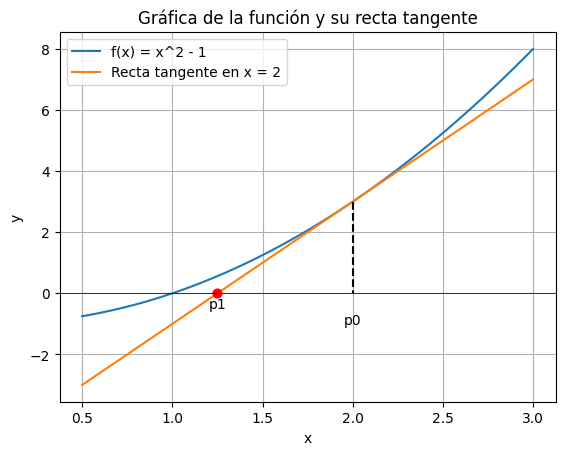

In [ ]:
# @title Gráfico ejemplo método de Newton {"vertical-output":true}
# Definimos la función
def f(x):
  return x**2 - 1

# Definimos la derivada de la función
def df(x):
  return 2*x

# Definimos el intervalo de x
x = np.linspace(0.5, 3, 100)

# Calculamos los valores de la función en el intervalo
y = f(x)

# Definimos el punto donde se calcula la recta tangente
p0 = 2

# Calculamos la recta tangente
m = df(p0)  # Pendiente de la tangente
b = f(p0) - m * p0  # Ordenada al origen de la tangente
tangente = m * x + b

# Calculamos el punto donde la tangente corta el eje x (p1)
p1 = -b / m


# Graficamos la función
plt.plot(x, y, label='f(x) = x^2 - 1')

# Graficamos la recta tangente
plt.plot(x, tangente, label='Recta tangente en x = 2')

# Marcamos el punto p0 en la curva y el eje x
plt.plot([p0, p0], [f(p0), 0], 'k--')  # Línea punteada vertical
plt.text(p0, -1, 'p0', ha='center')  # Etiqueta p0 en el eje x

# Marcamos el punto p1 en el eje x
plt.plot([p1, p1], [0, 0], 'ro')  # Punto rojo en p1
plt.text(p1, -0.5, 'p1', ha='center')  # Etiqueta p1 en el eje x


# Configura la gráfica
plt.axhline(y=0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de la función y su recta tangente')
plt.legend()
plt.grid(True)
plt.show()

Para hallar la fórmula de $p_1$ en términos de $p_0$ observamos lo siguiente:

La recta tangente a la gráfica de $y=f(x)$ en el punto $(p_0,f(p_0))$ tiene pendiente $m = f'(p_0)$.
Como la recta pasa por los puntos $(p_0,f(p_0))$ y $(p_1,0)$ resulta que

$$
\frac{0 - f(p_0)}{p_1-p_0} = m = f'(p_0).
$$

Despejando $p_1$ obtenemos

$$
p_1 = p_0 - \frac{f(p_0)}{f'(p_0)}.
$$

Ahora podemos repetir este procedimiento, y obtener $p_2$ a partir de $p_1$, la fórmula resulta

$$
p_2 = p_1 - \frac{f(p_1)}{f'(p_1)}.
$$

En general,

$$
p_{n+1} = p_n - \frac{f(p_n)}{f'(p_n)}.
$$



### El método de Newton como método de punto fijo

El método de Newton es un método de punto fijo, con función de iteración dada por

$$
g(x) = x - \frac{f(x)}{f'(x)}.
$$

Notar que $x = g(x)$ si y sólo si $f(x) = 0$ (siempre que $f'(x) \neq 0$).
En otras palabras, $x$ es solución de la ecuación original $f(x) = 0$ si y sólo si $x$ es un punto fijo de $g$.


Para comprender cómo funciona el método de Newton, analicemos $g'(x)$:

\begin{align*}
g'(x) &= 1 - \frac{f'(x) f'(x) - f(x) f''(x)}{[f'(x)]^2} \\
&= 1 - \frac{f'(x) f'(x) }{[f'(x)]^2}
+ \frac{ f(x) f''(x)}{[f'(x)]^2}
\\
&= \frac{ f(x) f''(x)}{[f'(x)]^2}.
\end{align*}

Notemos que si $x=p$ es una solución de la ecuación, es decir $f(p)=0$, entonces resulta

$$
|g'(p)|
= \frac{ |f(p)|\, |f''(p)|}{|f'(p)|^2}
= \frac{ 0 \, |f''(p)|}{|f'(p)|^2}
= 0.
$$

Luego, si $g'$ es una función continua, resulta que existe $\delta > 0$ tal que $|g'(x)| < 1/2$ en $[p-\delta,p+\delta]$.

Para que $g'$ sea continua es suficiente que $f$ sea $C^2$ y que $f'$ no se anule en una vecindad de $x=p$.

Recordando el [Teorema 3 (Punto fijo)](#teo:punto.fijo.v2) hemos deducido el siguiente teorema.

> ### Teorema 25 (Convergencia del método de Newton) <a name = "teo:convergencia.met.newton"></a>
Sea $p$ un cero de la función $f$, es decir $$f(p) = 0.$$
Si $f$ es $C^2$ en una vecindad de $p$, $f'(p) \neq 0$ y $p_0$ está suficientemente cerca de $p$, entonces la iteración de Newton<br><br>
$$
p_{n+1} = p_n - \frac{f(p_n)}{f'(p_n)},
\qquad n=0,1,2,\dots
$$<br>
converge a $p$.

> ### Observación
> El método de Newton es un método de punto fijo que *siempre funciona* (si comenzamos suficientemente cerca).
Nos da una manera de construir o elegir la función de iteración $g$ para que siempre resulte convergente.

Veamos un ejemplo, volvamos a resolver la ecuación

$$x = \cos(x).$$

Resolvámosla primero con el método de punto fijo $p_{n+1} = \cos(p_n)$. Para ir contando iteraciones lo hacemos de esta manera:


In [ ]:
g = lambda x: np.cos(x)
p0 = 1
p,contador = puntofijo(g, p0, 1e-5, 1000)

print("p =", p, "\n")
print("Se alcanzó en", contador, "iteraciones \n")

p = 0.7390822985224024 

Se alcanzó en 29 iteraciones 



El método de punto fijo necesitá 29 iteraciones para que la diferencia entre dos iterandos consecutivos fuera menor a $10^{-5}$.

Veamos ahora qué ocurre si usamos el método de Newton.

Escribimos primero la ecuación de la forma

$$x - \cos(x) = 0.$$

Es decir, $f(x) = x - \cos(x)$ y $f'(x) = 1 + \sin(x)$. Luego, la iteración de Newton toma la forma:

$$
p_{n+1} = p_n - \frac{p_n - \cos(p_n)}{1 + \sin(p_n)}.
$$

Probemos iterar *a mano*:

In [ ]:
p = 1
cont = 0
p = p - (p-np.cos(p))/(1+np.sin(p))
cont += 1
print(np.round(p,decimals = 5))
p = p - (p-np.cos(p))/(1+np.sin(p))
cont += 1
print(np.round(p,decimals = 5))
p = p - (p-np.cos(p))/(1+np.sin(p))
cont += 1
print(np.round(p,decimals = 5))
p = p - (p-np.cos(p))/(1+np.sin(p))
cont += 1
print(np.round(p,decimals = 5))

0.75036
0.73911
0.73909
0.73909


¿Qué?  ¿Sólo cuatro iteraciones? !No se puede creer! !Guau!

Sí, es así. El método de Newton es *rapidísimo*. Esto se debe a que no sólo ocurre que $|g'(x)| \le 1/2$ en un entorno de $x=p$ sino que además $g'(p) = 0$, por lo tanto, a medida que nos acercamos a la solución, el método se va *acelerando*.

Para ver mejor el efecto de aceleración, veamos lo que ocurre con todos los dígitos.

In [ ]:
p = 1
cont = 0
p = p - (p-np.cos(p))/(1+np.sin(p))
cont += 1
print(p)
p = p - (p-np.cos(p))/(1+np.sin(p))
cont += 1
print(p)
p = p - (p-np.cos(p))/(1+np.sin(p))
cont += 1
print(p)
p = p - (p-np.cos(p))/(1+np.sin(p))
cont += 1
print(p)
p = p - (p-np.cos(p))/(1+np.sin(p))
cont += 1
print(p)

0.7503638678402439
0.7391128909113617
0.739085133385284
0.7390851332151607
0.7390851332151607


Newton no deja de sorprendernos. Bastaron cinco iteraciones para que el error entre dos consecutivos sea menor que $10^{-16}$. Impresionante...

Veamos lo que ocurre con el error:

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#utilizamos el ultimo p como nuestro estimador del valor verdadero
p_verd = 0.7390851332151607
p = [1]
error = [np.abs(1-p_verd)]
cont = 0
for i in range(5):
  p_n = p[-1] - (p[-1]-np.cos(p[-1]))/(1+np.sin(p[-1]))
  cont += 1
  p.append(p_n)
  error.append(np.abs(p_n-p_verd))

# Datos de la tabla
iteracion = range(len(p))  # Lista con los números de iteración
p_n_valores = p            # Lista con los valores de pn
errores = error          # Lista con los errores estimados

# Crear un DataFrame de pandas
tabla = pd.DataFrame({'Iteración': iteracion, 'p_n': p_n_valores, 'Error': errores})

# Mostrar la tabla
display(tabla.style.format({"p_n":"{:.16e}","Error": "{:.1e}"}).hide(axis="index"))


Iteración,p_n,Error
0,1.0000000000000000e+00,2.6e-01
1,7.5036386784024389e-01,1.1e-02
2,7.3911289091136168e-01,2.8e-05
3,7.3908513338528403e-01,1.7e-10
4,7.3908513321516067e-01,0.0e+00
5,7.3908513321516067e-01,0.0e+00


Vemos que la cantidad de ceros después del punto decimal en el error es, en cada iteración, aproximadamente el doble que en la iteración anterior.

Antes de proseguir dejemos formalizada la función de Newton para poder utilizar cuando la necesitemos.

In [ ]:
def newton(f, df, x0, tol=1e-6, max_iter=100):
    """
    Método de Newton para encontrar la raíz de f(x) = 0.

    Parámetros:
    - f: función f(x)
    - df: derivada f'(x)
    - x0: aproximación inicial
    - tol: tolerancia para la convergencia
    - max_iter: número máximo de iteraciones

    Retorna:
    - xn: aproximación de la raíz
    - iteraciones: número de iteraciones realizadas
    """
    xn = x0
    for i in range(max_iter):
        fxn = f(xn)
        dfxn = df(xn)

        if dfxn == 0:  # Evitar división por cero
          raise ValueError("Derivada cero. El método de Newton falla.")
        else:
          delta = - fxn / dfxn  # Paso de Newton

          if abs(delta) < tol:  # Criterio de convergencia
            return xn + delta, i + 1
          else:
            xn = xn + delta

    raise ValueError("El método de Newton no converge después de {} iteraciones".format(max_iter))

Verifiquemos su funcionamiento con el siguiente ejemplo para encontrar el valor de $\sqrt{2}$, es decir queremos resolver $x^2=2$:

In [ ]:
  f = lambda x: x**2 - 2  # Queremos encontrar sqrt(2)
  df = lambda x: 2*x  # Derivada de f(x)

  x0 = 1.0  # Aproximación inicial
  raiz, iteraciones = newton(f, df, x0)

  print(f"Raíz encontrada: {raiz:.6f} en {iteraciones} iteraciones")

Raíz encontrada: 1.414214 en 5 iteraciones


## Pongámonos a prueba!!! 🤓
Intentá hayar la solución a los siguientes problemas con los conocimientos adquiridos en esta sección.
Recordá que si bien estás buscando un resultado en particular, herramientas como gráficas u otros cálculos auxiliares pueden ser de mucha ayuda para llegar a este.
Podés resolver utilizando celdas de código en este mismo colab, o corriendo python de manera local.

### Ejercicio Newton 1



Repitamos el Ejercicio 1 de Bisección empleando el método de Newton.

Utilice el método de Newton para calcular con 10 dígitos correctos todas las raíces positivas de la función $f(x) = sen(x) + cos(1+x^2)-1$ que son menores que 5.

¿Cuántas iteraciones fueron necesarias en cada caso? Corrobore que el error decrece cuadráticamente.

#1.4 Velocidad de Convergencia <a name = "sec:vel.convergencia"></a>

Para entender por qué es tan rápido el método de Newton, definiremos a continuación una manera de estudiar la *velocidad de convergencia* de los métodos iterativos.

>### Definición (Orden de convergencia)
Supongamos que la sucesión $\{p_n\}$ tiende a $p$ cuando $n\to\infty$. Si existen $A>0$ y $R > 0$ tales que
$$\frac{|p-p_{n+1}|}{|p-p_n|^R} \to A, \quad\text{cuando }n \to \infty,$$
entonces se dice que $p_n \to p$ con orden $R$.

En caso $R=1$ se dice que la convergencia es *lineal*.

Para $n$ grande, resulta
$$\frac{|p-p_{n+1}|}{|p-p_n|} \approx A,$$
es decir

$$|p-p_{n+1}| \approx A |p-p_n|$$

y para que resulte convergente hace falta que $A < 1$.

Veamos dos ejemplos, el caso $A=0.1$ y el caso $A = \sqrt{0.1} \approx 0.316$.

|$n$ | $|p-p_n|$ con $\small  A=0.1$ | $|p-p_n|$ con $\small A=\sqrt{0.1}$ |
|--|--|--|
|1|0.23|0.23|
|2|0.023|0.07273|
|3| 0.0023|0.023|
|4| 0.00023|0.007273|
|5| 0.000023|0.0023|
|6| 0.0000023|0.0007273|
|7| 0.00000023|0.00023|

Vemos que en el caso $A=0.1$ el error es en cada paso un 10% del error en el caso anterior. Se dice que *se gana un dígito por iteración}*.

En el caso $A= \sqrt{0.1} \approx 0.316$ *se gana un dígito cada dos iteraciones*.
Lo importante es que en los métodos de convergencia lineal se gana un dígito cada un cierto número de iteraciones, pero esto se mantiene fijo a lo largo de toda la iteración.

Veamos qué ocurre con un caso de convergencia cuadrática, es decir, con $R=2$. Para simplificar la presentación consideramos $A=1$.

| n	|$|p-p_n|$|
|--|--|
| 0 |	$10^{-1}  =$ 0.10000000000000000000000000000000 |
|	1	| $10^{-2}  =$ 0.010000000000000000000000000000000 |
|	2	| $10^{-4}  =$ 0.000100000000000000000000000000000 |
|	3	| $10^{-8}  =$ 0.000000010000000000000000000000000 |
|	4	| $10^{-16} =$ 0.00000000000000010000000000000000 |
|	5	| $10^{-32} =$ 0.00000000000000000000000000000001 |
|	6	| $10^{-64} =$ ... |


Ahora que hemos comprendido lo que significa *orden de convergencia*, enunciamos el siguiente teorema.



> ### Teorema 28 (Orden de convergencia del método de Newton).
Consideremos el caso en que el método de Newton genera una sucesión $\{p_n\}_{n=0}^\infty$ que converge a un cero $p$ de la función $f(x)$. Entonces:
*   Si $p$ es una raíz simple, es decir $f'(p) \neq 0$, entonces la convergencia es cuadrática, y para $n$ grande se cumple que
$$| p - p_{n+1}| \approx \frac{|f''(p)|}{2 |f'(p)|} |p - p_n|^2.$$<br>
*   Si $p$ es una raíz múltiple de orden $M>1$, es decir $f'(p) = f''(p) = \dots = f^{(M-1)}(p) = 0$ con $f^{(M)}(p) \neq 0$, entonces la convergencia es lineal, y para $n$ grande se cumple que <br><br>
$$| p - p_{n+1}| \approx \frac{M-1}{M} |p - p_n|.$$

En palabras, concluimos lo siguiente:

*   El método de Newton siempre converge, si comenzamos con $p_0$ suficientemente cerca de $p$.
*   La convergencia del método de Newton es cuadrática ($R=2$, el número de dígitos exactos se duplica en cada iteración), si $f'(p)\neq 0$.

Si bien no incluimos la demostración de este teorema en este apunte, vale la pena mencionar que la recta tangente a la gráfica de $y=f(x)$ que pasa por $(p_n,f(p_n))$ tiene ecuación

$$y = f(p_n) + (x - p_n) f'(p_n)$$

y por el teorema de Taylor

$$f(x) = f(p_n) + (x - p_n) f'(p_n) + \frac{(x-p_n)^2}2 f''(z)$$

para algún $z$ entre $x$ y $p_n$. Esta fórmula nos dice que la ecuación de la recta tangente nos da una aproximación de la función $f(x)$ con un error

$$\frac{(x-p_n)^2}2 f''(z).$$

Este error es menor a $\dfrac{M_2 (x-p_n)^2}2 $ si $M_2$ es una cota para el valor absoluto de $f''$.

Como ese error es cuadrático en términos de la distancia a $p_n$, el método de Newton resulta con convergencia cuadrática.

#1.5 El método de la secante <a name = "sec:met.secante"></a>

En el caso en que uno no pueda calcular la derivada de $f$, se puede reemplazar la pendiente de la recta tangente por la pendiente de una recta *secante*, es decir, una recta que pase por dos puntos de la gráfica de $y=f(x)$. La idea es comenzar entonces con $p_0$ y $p_1$ cercanos a $p$, y definir $p_2$ como la abscisa del punto intersección entre el eje $x$ y la recta que pasa por $(p_0,f(p_0))$ y por $(p_1,f(p_1))$, como muestra la siguiente figura:

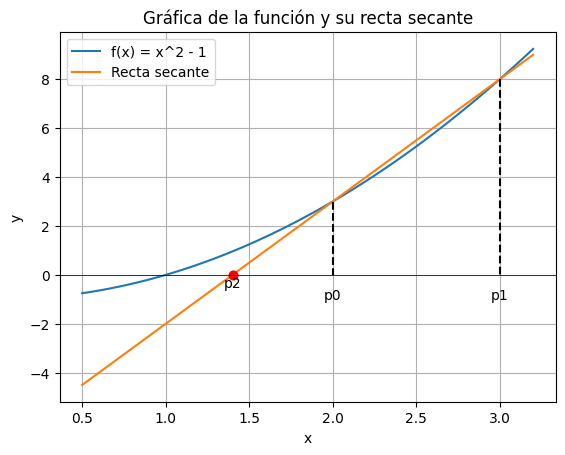

In [ ]:
# @title Figura: esquema de un paso del método de la secante {"vertical-output":true}
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función
def f(x):
  return x**2 - 1

# Definimos el intervalo de x
x = np.linspace(0.5, 3.2, 100)

# Calculamos los valores de la función en el intervalo
y = f(x)

# Definimos los dos puntos iniciales para la secante
p0 = 2
p1 = 3

# Calculamos la recta secante
m = (f(p1) - f(p0)) / (p1 - p0)  # Pendiente de la secante
b = f(p0) - m * p0  # Ordenada al origen de la secante
secante = m * x + b

# Calculamos el punto donde la secante corta el eje x (p2)
p2 = -b / m

# Graficamos la función
plt.plot(x, y, label='f(x) = x^2 - 1')

# Graficamos la recta secante
plt.plot(x, secante, label='Recta secante')

# Marcamos los puntos p0 y p1 en la curva
plt.plot([p0, p0], [f(p0), 0], 'k--')  # Línea punteada vertical para p0
plt.plot([p1, p1], [f(p1), 0], 'k--')  # Línea punteada vertical para p1
plt.text(p0, -1, 'p0', ha='center')  # Etiqueta p0 en el eje x
plt.text(p1, -1, 'p1', ha='center')  # Etiqueta p1 en el eje x


# Marcamos el punto p2 en el eje x
plt.plot([p2, p2], [0, 0], 'ro')  # Punto rojo en p2
plt.text(p2, -0.5, 'p2', ha='center')  # Etiqueta p2 en el eje x

# Configura la gráfica
plt.axhline(y=0, color='black', linewidth=0.5)  # Eje x
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de la función y su recta secante')
plt.legend()  # Muestra la leyenda
plt.grid(True)  # Activa la cuadrícula
plt.show()  # Muestra la gráfica


Para obtener la fórmula de $p_2$ en términos de $p_0$ y $p_1$ observamos primero que la pendiente de la recta secante es

$$m = \frac{f(p_1)-f(p_0)}{p_1-p_0}.$$

Luego, usando que $(p_1,f(p_1))$ y $(p_2,0)$ pertenecen a esa recta, resulta

$$\frac{f(p_1) - 0}{p_1 - p_2}  = m.$$

En consecuencia,

$$\frac{f(p_1) - 0}{p_1 - p_2} = \frac{f(p_1)-f(p_0)}{p_1-p_0}$$

y despejando $p_2 $ obtenemos

$$p_2 = p_1 - f(p_1) \frac{p_1-p_0}{f(p_1)-f(p_0)}.$$

En general, teniendo $p_{n-1}$ y $p_n$, obtenemos $p_{n+1}$ a partir de la siguiente fórmula:

$$p_{n+1} = p_n - f(p_n) \frac{p_n-p_{n-1}}{f(p_n)-f(p_{n-1})}.$$

El resultado de convergencia para el método de la secante se enuncia a continuación:

> ### Teorema 30 (Convergencia del método de la secante)
Sea $p$ un cero de la función $f$, es decir
$f(p) = 0.$
>
>Si $f$ es $C^2$ en una vecindad de $p$, $f'(p) \neq 0$ y $p_0$, $p_1$ están suficientemente cerca de $p$, entonces la iteración del método de la secante
>
>$$p_{n+1} = p_n - f(p_n) \frac{p_n-p_{n-1}}{f(p_n)-f(p_{n-1})}, \qquad n=1,2,\dots
$$
>
>converge a $p$. El orden del método es $R = \frac{1+\sqrt5}2 \approx 1.61803\dots$ (número de oro o razón áurea).

A continuación presentamos el código para el método de la secante.

In [ ]:
import numpy as np

def secante(f, p0, p1, tol, maxiter):
  """
  Método de la secante para ecuaciones no lineales.

  Args:
    f: función escalar. Ecuación a resolver f(x) = 0.
    p0, p1: aproximaciones iniciales.
    tol: tolerancia para el error absoluto.
    maxiter: máximo número de iteraciones permitido.

  Returns:
    p: aproximación de la raíz.
    residuo: valor de la función en la aproximación de la raíz.
  """
  contador = 1
  f0 = f(p0)
  f1 = f(p1)
  p = p1 - f1 * (p1 - p0) / (f1 - f0)

  while (abs(p - p1) > tol) and (contador <= maxiter):
    p0 = p1
    f0 = f1
    p1 = p
    f1 = f(p)
    p = p1 - f1 * (p1 - p0) / (f1 - f0)
    contador += 1

  if contador > maxiter:
    print("Se superó el máximo de iteraciones")

  residuo = f(p)
  return p, residuo

Vale la pena notar aquí que `p0` y `p1` almacenan a $p_{n-1}$ y $p_n$, respectivamente.
Otra cosa a tener en cuenta es que en la fórmula del cálculo de `p` (correspondiente a $p_{n+1}$) no se usa `f(p0)` ni `f(p1)` sino `f0` y `f1`. Esto se hace así para evitarle a la computadora el trabajo de calcular $f(p_n)$ varias veces para cada $p_n$.

## Pongámonos a prueba!!! 🤓
Intentá hayar la solución a los siguientes problemas con los conocimientos adquiridos en esta sección.
Recordá que si bien estás buscando un resultado en particular, herramientas como gráficas u otros cálculos auxiliares pueden ser de mucha ayuda para llegar a este.
Podés resolver utilizando celdas de código en este mismo colab, o corriendo python de manera local.

### Ejercicio Secante 1
Repitamos el Ejercicio 1 de Bisección y Newton, pero ahora con el método de la secante.

Utilice el método de la secante para calcular con 10 dígitos correctos todas las raíces positivas de la función $f(x) = sen(x) + cos(1+x^2)-1$ que son menores que 5.

¿Cuántas iteraciones fueron necesarias en cada caso? Compárelas con los resultados obtenidos mediante los otros métodos. ¿Qué método le
parece más conveniente y por qué? Piense en algunas ventajas y desventajas de los mismos.

#1.6 Métodos iterativos para sistemas de ecuaciones <a name = "sec:met.iter.para.sist.de.ec"></a>

Consideremos el siguiente sistema de dos ecuaciones no lineales con dos incógnitas:<a name = "eq:probl.punto.fijo.vectorial"></a>

$$\begin{align}
x^2 - 2x - y + 0.5 &= 0, \\
x^2 + 4 y^2 - 4 &= 0.
\end{align} \qquad (1.3)$$

En términos geométricos, la primera ecuación representa una parábola y la segunda una elipse.
Resolver este sistema significa hallar la intersección de las curvas.

El siguiente script permite graficar las curvas para encontrar aproximadamente las soluciones del sistema.<a name = "fig:curvas.de.nivel"></a>


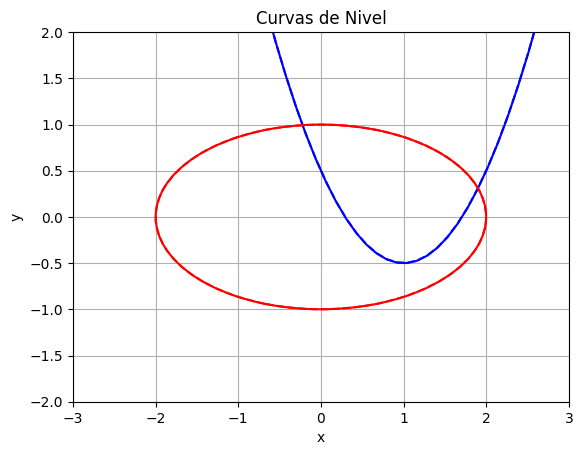

In [ ]:
# @title Figura 2: curvas de nivel
import numpy as np
import matplotlib.pyplot as plt

# Define las funciones z1 y z2
def z1(x, y):
  return x**2 - 2*x - y + 0.5

def z2(x, y):
  return x**2 + 4*y**2 - 4

# Crea la malla de puntos
x = np.linspace(-3, 3, 50)
y = np.linspace(-2, 2, 50)
x, y = np.meshgrid(x, y)

# Grafica las curvas de nivel
plt.contour(x, y, z1(x, y), [-0.001, 0.001], colors='b') # Niveles cercanos a 0
plt.contour(x, y, z2(x, y), [-0.001, 0.001], colors='r') # Niveles cercanos a 0

# Agrega la cuadrícula y etiquetas
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de Nivel')

# Guarda la gráfica
plt.savefig('curvasdenivel.png')
plt.savefig('curvasdenivel.eps')

# Muestra la gráfica
plt.show()

Con ayuda del comando `help` investigue qué hacen las instrucciones `np.meshgrid` y `plt.contour` para entender qué está graficando y cómo haría para graficar curvas en otro problema.

Vemos a partir del gráfico que hay dos soluciones. Aunque dependiendo de la posición relativa de la parábola con respecto a la elipse se ve claramente que podría haber 1, 2, 3 o 4 soluciones, o hasta ninguna solución.

Para otros sistemas de ecuaciones puede ocurrir que haya un número $n$ a priori desconocido de soluciones, o también infinitas.

Esto muestra que los sistemas **no lineales** de ecuaciones presentan en general un comportamiento mucho más complejo que los sistema **lineales**.Recordemos que para sistemas lineales había sólo tres opciones:

*  Existe una única solución.
*  No hay solución.
*  Hay infinitas soluciones.

##1.6.1 Método de punto fijo para sistema de ecuaciones <a name = "sec:met.punto.fijo.para.sist.de.ec"></a>

El gráfico nos permite tener una primera aproximación de cada solución, pero quisiéramos hallarlas con más precisión. La primera opción es fabricarnos un método de punto fijo. Para ello, podemos despejar un $x$ de la primera ecuación y un $y$ de la segunda, por ejemplo:

$$x = \frac{x^2-y+0.5}2, \qquad y = \frac{-x^2-4y^2+8y+4}8.$$

Ahora reescribimos estas dos ecuaciones como una ecuación vectorial

$$
\begin{bmatrix}x\\y \end{bmatrix}
=
\begin{bmatrix} \dfrac{x^2-y+0.5}2 \\ \dfrac{-x^2-4y^2+8y+4}8 \end{bmatrix}.
$$

Tomando la función $G:\mathbb{R}^2 \to \mathbb{R}^2$ dada por

$$G\left(\begin{bmatrix}x\\y \end{bmatrix}\right)
= \begin{bmatrix} g_1(x,y) \\ g_2(x,y) \end{bmatrix} =
\begin{bmatrix} \dfrac{x^2-y+0.5}2 \\ \dfrac{-x^2-4y^2+8y+4}8 \end{bmatrix},$$

la solución al problema [1.3](#eq:probl.punto.fijo.vectorial) se reduce a encontrar un punto fijo $\mathbf{p}=[p_1,p_2]^T\in\mathbb{R}^2$ de la función $G$, es decir,

$$\mathbf{p}=G(\mathbf{p})$$
o en coordenadas
$$\begin{bmatrix}p_1\\p_2 \end{bmatrix}
= \begin{bmatrix} \frac{p_1^2-p_2+0.5}2 \\ \frac{-p_1^2-4p_2^2+8p_2+4}8 \end{bmatrix}.$$

Esto sugiere que podríamos repetir la estrategia del método de punto fijo unidimensional pero en varias variables.

Observando la la [Figura 2: curvas de nivel](#fig:curvas.de.nivel) tomemos como una aproximación inicial de una de las soluciones el punto  $\mathbf{p}_0 = [ 0, 1]^T$. Luego, iteremos sucesivamente la función $G$ haciendo $\mathbf{p}_{n}=G(\mathbf{p}_{n-1})$ como muestra el siguiente código:

In [ ]:
G = lambda x,y: np.array([[(x**2 - y + 0.5) / 2], [(-x**2 - 4 * y**2 + 8 * y + 4) / 8]])

p = np.array([[0],[1]])

print("p 0 =\n",p,"\n")

for i in range(9):
  p = G(p[0,0],p[1,0])
  print("p",i+1,"=\n",p,"\n")

Veamos ahora qué ocurre cuando comenzamos con $\mathbf{p}_0=[2, 0]^T$ que está cerca de la otra solución.

In [ ]:
p = np.array([[2],[0]])

print("p 0 =\n",p,"\n")

for i in range(9):
  p = G(p[0,0],p[1,0])
  print("p",i+1,"=\n",p,"\n")

Vemos que en este caso la iteración ¡no converge!

Veamos qué ocurre si comenzamos más cerca, por ejemplo, a partir de $\mathbf{p}_0 = [ 1.9, 0.31 ]^T$:

In [ ]:
p = np.array([[1.9],[0.31]])

print("p 0 =\n",p,"\n")

for i in range(9):
  p = G(p[0,0],p[1,0])
  print("p",i+1,"=\n",p,"\n")

No parece converger al menos en tan pocas iteraciones. Démosle más pasos y veamos qué ocurre:

In [ ]:
p = np.array([[1.9],[0.31]])

for i in range(25):
  p = G(p[0,0],p[1,0])
  if i>9:
    print("p",i+1,"=\n",p,"\n")

En este caso la iteración converge a la primera solución que ya habíamos encontrado.

Parece que el punto que queremos hallar, no es un *punto de atracción* de esa iteración de punto fijo.

En el caso unidimensional (una ecuación con una incógnita), hemos visto que la iteración de punto fijo $p_{n+1} = g(p_n)$ converge *localmente* al punto fijo $p$ si $|g'(p)| < 1$.
Se dice que un método converge *localmente* si lo hace cuando comenzamos suficientemente cerca.

En el caso de sistemas de ecuaciones, el rol de la derivada $g'$ lo juega la matriz Jacobiana de la función $\mathbf{G}$. Recordemos que si $\mathbf{G}:\mathbb{R}^2 \to \mathbb{R}^2$ viene dada por

$$
\mathbf{G}\left(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}\right)
= \begin{bmatrix}g_1(x_1,x_2) \\ g_2(x_1,x_2) \end{bmatrix},
$$

su matriz Jacobiana o su *diferencial* es la matriz

$$
D\mathbf{G}\left(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}\right)
 = \begin{bmatrix}\frac{\partial g_1}{\partial x_1}(x_1,x_2) & \frac{\partial g_1}{\partial x_2}(x_1,x_2) \\
 \frac{\partial g_2}{\partial x_1}(x_1,x_2) & \frac{\partial g_2}{\partial x_2}(x_1,x_2)\end{bmatrix}= \begin{bmatrix} \nabla^T g_1(x_1,x_2) \\ \nabla^T g_2(x_1,x_2) \end{bmatrix}
$$

Para recordar, la primera fila de $D\mathbf{G}$ tiene todas las derivadas de $g_1$ y la segunda fila de tiene todas las derivadas de $g_2$.

En general, si $\mathbf{G}:\mathbb{R}^N \to \mathbb{R}^N$ y

$$
\mathbf{G}(\mathbf{x})
= \begin{bmatrix}g_1(\mathbf{x}) \\ g_2(\mathbf{x}) \\ \vdots \\ g_N(\mathbf{x})\end{bmatrix},
\qquad\text{con } \mathbf{x}=\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_N \end{bmatrix}=,
$$

su matriz Jacobiana o su *diferencial* es la matriz

$
D\mathbf{G}(\mathbf{x})
 = \begin{bmatrix}\frac{\partial g_1}{\partial x_1}(\mathbf{x}) & \frac{\partial g_1}{\partial x_2}(\mathbf{x}) & \dots & \frac{\partial g_1}{\partial x_N}(\mathbf{x}) \\
   \frac{\partial g_2}{\partial x_1}(\mathbf{x}) & \frac{\partial g_2}{\partial x_2}(\mathbf{x}) & \dots & \frac{\partial g_2}{\partial x_N}(\mathbf{x}) \\
   \vdots & \vdots & & \vdots \\
   \frac{\partial g_N}{\partial x_1}(\mathbf{x}) & \frac{\partial g_N}{\partial x_2}(\mathbf{x}) & \dots & \frac{\partial g_N}{\partial x_N}(\mathbf{x})
   \end{bmatrix}= \begin{bmatrix} \nabla^T g_1(\mathbf{x}) \\ \nabla^T g_2(\mathbf{x}) \\ \vdots\\ \nabla^T g_N(\mathbf{x})\end{bmatrix}
$

De esta forma el teorema de punto fijo en $\mathbb{R}^N$ dice lo siguiente:

> ### Teorema 31
Sea $\mathbf{p}\in\mathbb{R}^N$ un punto fijo de $\mathbf{G}: \mathbb{R}^N \to \mathbb{R}^N$, es decir $\mathbf{p} = \mathbf{G}(\mathbf{p}).$
>
>Si $\mathbf{G}$ es $C^1$ en un entorno de $\mathbf{p}$ y
$$\big\| D\mathbf{G}(\mathbf{p}) \big\|_1 < 1, \qquad \text{con }\big\| D\mathbf{G}(\mathbf{p}) \big\|_1 = \max\limits_{1\le i\le N} \sum_{j=1}^N \left| \frac{\partial g_i}{\partial x_j} (\mathbf{p}) \right|$$
>
> entonces la iteración de punto fijo
$$\mathbf{p}_{n+1} = \mathbf{G}(\mathbf{p}_n)$$
>
> converge localmente. Es decir, hay un entorno alrededor de $\mathbf{p}$ tal que si $\mathbf{p}_0$ está en ese entorno, resulta que $\mathbf{p}_n \to \mathbf{p}$.




En general es difícil de verificar que $\big\|D\mathbf{G}(\mathbf{p})\big\|_1 < 1$, sobre todo porque no se conoce $\mathbf{p}$. El teorema recién enunciado es de carácter teórico.

Ahora pensemos, si estamos dispuestos a calcular todas esas derivadas, ¿por qué no usamos un método de Newton?

##1.6.2 Método de Newton para sistemas de ecuaciones <a name = "sec:met.newton.para.sist.de.ec"></a>

Consideremos ahora un sistema de ecuaciones no lineales, escrito de la siguiente manera:

$$
f_1(x_1,x_2,\dots,x_N) = 0 \\
f_2(x_1,x_2,\dots,x_N) = 0 \\
\vdots  \\
f_N(x_1,x_2,\dots,x_N) = 0 ,$$

con $f_1$, $f_2$, $\dots$, $f_N$, funciones escalares.
Si definimos la función vectorial $\mathbf{F}:\mathbb{R}^N \to \mathbb{R}^N$ de la siguiente manera:

$$
\mathbf{F}(\mathbf{x}) =
\begin{bmatrix}
f_1(\mathbf{x}) \\
f_2(\mathbf{x}) \\
\vdots \\
f_N(\mathbf{x})
\end{bmatrix}
,
\qquad\text{con }
\mathbf{x} = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_N
\end{bmatrix}$$

El sistema de ecuaciones puede escribirse de manera compacta como

$$\mathbf{F}(\mathbf{x}) = \mathbf{0},$$

donde $\mathbf{0}=[0,0,\ldots,0]^T\in\mathbb{R}^N$.

Supongamos que tenemos $\mathbf{p}_0$ cercano a $\mathbf{p}$, una solución de ese sistema de ecuaciones, es decir, $\mathbf{F}(\mathbf{p}) = 0$.

Entonces, tal como lo hicimos para una ecuación escalar, consideramos la aproximación lineal a $\mathbf{F}$ alrededor de $\mathbf{p}_0$, que está dada por la fórmula

$$
\ell(\mathbf{x}) = \mathbf{F}(\mathbf{p}_0) + D\mathbf{F}(\mathbf{p}_0) (\mathbf{x} - \mathbf{p}_0),$$

notando que $D\mathbf{F}(\mathbf{p}_0)$ es una matriz de $N\times N$, la matriz Jacobiana de $\mathbf{F}$ en $\mathbf{p}_0$, y $D\mathbf{F}(\mathbf{p}_0) (\mathbf{x} - \mathbf{p}_0)$ es el producto matricial de la matriz $D\mathbf{F}(\mathbf{p}_0)$ de $N\times N$ por el vector $\mathbf{x} - \mathbf{p}_0$ de $N\times 1$.

A continuación, definimos $\mathbf{p}_1$ como el punto de $\mathbb{R}^N$ para el que $\ell(\mathbf{x}) = \mathbf{0}$, es decir, planteamos el problema


Hallar $\mathbf{p}_1$ tal que: $ \quad
\mathbf{F}(\mathbf{p}_0) + D\mathbf{F}(\mathbf{p}_0) (\mathbf{p}_1 - \mathbf{p}_0) = \mathbf{0}.$

Si llamamos $\delta \mathbf{p} = (\mathbf{p}_1 - \mathbf{p}_0)\in\mathbb{R}^N$ resulta que $\delta \mathbf{p}$ es la solución al siguiente sistema *lineal* de $N$ ecuaciones con $N$ incógnitas:

$$D\mathbf{F}(\mathbf{p}_0) \delta \mathbf{p} = - \mathbf{F}(\mathbf{p}_0).
$$

que ya está escrito en forma matricial.
Observemos nuevamente que

*   $D\mathbf{F}(\mathbf{p}_0)$ es una matriz de $N\times N$.
*   $\mathbf{F}(\mathbf{p}_0)$ es un vector columna de $N$ componentes, o una matriz de $N\times 1$.
*   $\delta \mathbf{p}$ es un vector columna de $N$ componentes, y es la incógnita que nos dirá cómo elegir $\mathbf{p}_1$. De la relación $\delta \mathbf{p} = (\mathbf{p}_1 - \mathbf{p}_0)$ obtenemos
$\mathbf{p}_1 := \mathbf{p}_0 + \delta \mathbf{p}.$

Este razonamiento nos condujo a una manera de definir $\mathbf{p}_1$ a partir de $\mathbf{p}_0$. Análogamente podemos encontrar la manera de definir $\mathbf{p}_{n+1}$ a partir de $\mathbf{p}_n$. La resumimos a continuación.

>1.   Dado $\mathbf{p}_n$, sea $\delta \mathbf{p}$ la solución al sistema lineal de ecuaciones
>
>$$\underbrace{D\mathbf{F}(\mathbf{p}_n)}_{\text{conocido}} \underbrace{\delta \mathbf{p}}_{\text{incógnita}}
= - \underbrace{\mathbf{F}(\mathbf{p}_n)}_{\text{conocido}}.$$
>2.   Definir $\mathbf{p}_{n+1} = \mathbf{p}_n + \delta \mathbf{p}$.

A continuación mostramos una implementación del método de Newton para sistemas de ecuaciones no lineales (o *Newton vectorial*).


In [ ]:
def newtonvec(F, Fprima, p0, tol=1e-6, maxiter=100):
  """
  Método de Newton para sistemas de ecuaciones.

  Args:
    F: Función que recibe un vector columna y devuelve un vector columna.
    Fprima: Función que recibe un vector columna y devuelve la matriz Jacobiana de F.
    p0: Aproximación inicial (vector columna).
    tol: Tolerancia para el error absoluto.
    maxiter: Máximo número de iteraciones permitido.

  Returns:
    p: Solución aproximada.
    residuo: Residuo de la solución.
  """
  contador = 1
  deltap = np.linalg.solve(Fprima(p0), -F(p0))
  p = p0 + deltap
  while (np.max(np.abs(deltap)) > tol) and (contador <= maxiter):
    deltap = np.linalg.solve(Fprima(p), -F(p))
    p = p + deltap
    contador += 1
  if contador > maxiter:
    print("Se superó el máximo de iteraciones")
  residuo = F(p)
  return p, residuo

Veamos cómo se utiliza esta función para hallar la solución del siguiente sistema de ecuaciones:

$$
x^2 y + x y^3 = 9 \\
3 x^2 y - y^3 = 4.$$

Primero las escribimos con lado derecho igual a cero:

$$ x^2 y + x y^3 -9 = 0 \\
\; 3 x^2 y - y^3 -4 = 0.$$

Luego, definimos $\mathbf{F}:\mathbb{R}^2 \to \mathbb{R}^2$,

$$\mathbf{F}\left(\begin{bmatrix}
x \\
y
\end{bmatrix}\right) = \begin{bmatrix}
x^2 y + x y^3 -9  \\
3 x^2 y - y^3 - 4
\end{bmatrix}$$

y el sistema es equivalente a resolver $\mathbf{F}(\mathbf{x}) = \mathbf{0}$. El Jacobiano de $\mathbf{F}$ es

$$
D\mathbf{F}(\mathbf{x}) = \begin{bmatrix}
2x y + y^3 & x^2+3x y^2 \\6x y  & 3x^2-3y^2
\end{bmatrix}$$

Comenzaremos con la aproximación inicial $\mathbf{p}_0 = \begin{bmatrix} 1\\ 1\end{bmatrix}$. Ya estamos en condiciones de hacerlo. Como hay que hacer un par de definiciones medio largas, conviene poner todo en un script en lugar de tipear en la línea de comandos.


In [ ]:
import numpy as np

# Define las funciones z1 y z2 como funciones lambda
f1 = lambda x, y: x**2 * y + x * y**3 - 9
f2 = lambda x, y: 3 * x**2 * y - y**3 - 4

# Define la función F
F = lambda x: np.array([[f1(x[0,0], x[1,0])], [f2(x[0,0], x[1,0])]])

# Define las derivadas parciales de z1 y z2 como funciones lambda
df1x = lambda x, y: 2 * x * y + y**3
df1y = lambda x, y: x**2 + 3 * x * y**2
df2x = lambda x, y: 6 * x * y
df2y = lambda x, y: 3 * x**2 - 3 * y**2

# Define el Jacobiano de F
DF = lambda x: np.array([[df1x(x[0,0], x[1,0]), df1y(x[0,0], x[1,0])],
                   [df2x(x[0,0], x[1,0]), df2y(x[0,0], x[1,0])]])

# Define la aproximación inicial
p0 = np.array([[1], [1]])

# Define la tolerancia y el máximo de iteraciones
tol = 1e-12
maxiter = 150

# Llama a la función newtonvec
p, residuo = newtonvec(F, DF, p0, tol, maxiter)

# Imprime la solución y el residuo
print("Solución p es\n", p ,"\n")
print("El residuo f(p) es\n", residuo ,"\n")

Solución p es
 [[1.31441389]
 [1.66944455]] 

El residuo f(p) es
 [[ 0.0000000e+00]
 [-8.8817842e-16]] 



Finalizamos este capítulo enunciando lo siguiente:

*   El método de Newton **siempre converge**, si comenzamos con $\mathbf{p}_0$ suficientemente cerca de $\mathbf{p}$ y $D\mathbf{F}(\mathbf{x})$ es una matriz invertible en un entorno de $\mathbf{p}$.
*   La convergencia del método de Newton vectorial es cuadrática ($R=2$), es decir, el número de dígitos exactos se duplica en cada iteración, si $D\mathbf{F}(\mathbf{p})$ es invertible.



## Pongámonos a prueba!!! 🤓
Intentá hayar la solución a los siguientes problemas con los conocimientos adquiridos en esta sección.
Recordá que si bien estás buscando un resultado en particular, herramientas como gráficas u otros cálculos auxiliares pueden ser de mucha ayuda para llegar a este.
Podés resolver utilizando celdas de código en este mismo colab, o corriendo python de manera local.

### Problema Newton Vectorial 1


Encuentre con ocho dígitos decimales correctos los valores de $x < 0$ e $y < 0$ tales que:
$$ 1.5x^2 + 2y - y^2 + cos(x) = 0.5,$$
$$2x + y^2 = 6.$$

### Problema Newton Vectorial 2


Utilizar el método de Newton para hallar todas las soluciones de los siguientes sistemas con una precisión de $10^{-6}. Graficarlas sobre las curvas para verificar.

(a) $x^2 + xy^3 = 9, \quad 3x^2y - y^3 = 4,$ para $(x, y) ∈ [−4, 4] \times [−4, 4].$

(b) $3w^2 - z^2 = 0, \quad 3wz^2 - w^3 = 1,$ para $(w, z) ∈ [0, 3] \times [0, 2].$

### Problema Newton Vectorial 3



Determine los parámetros positivos $a$ y $b$ (con error menor a $10^{-5}$) de manera que la gráfica de la función
$$z(t) = tan^{-1}(t - a) + ln(bt)$$
pase exactamente por los puntos indicados en la siguiente tabla

|t|1|2|
|-|-|-|
|**z**|-0.035|0.94|

### Problema Newton Vectorial 4


Considere la función $C(x, y) = y sen(x) + x sin(y^2),$ para $1 < x < 3, 1 < y < 3.$

Calcule con 9 dígitos decimales correctos los valores de $x$ e $y$ que maximizan $C$.

### Problema Newton Vectorial 5


Después de una tormenta, se mide la concentración de una determinada bacteria en un área de natación:

|t (hs)|4|24|
|-|-|-|
|C (UFC/100ml)|1590|560|

El tiempo se mide en horas transcurridas después de finalizar la tormenta, y la unidad UFC es una unidad formadora de colonia. Se sabe que la concentración tiene la forma $C(t) = be^{-kt}$, para algunas constantes $b$ y $k$ positivas.

(a) Determine los valores de $b$ y de $k$.

(b) Utilice el modelo para estimar la concentración al final de la tormenta.

(c) Utilice el modelo para determinar el tiempo en el que la concentración será $200 UFC / 100 mL$.

#Ejercicios Adicionales 🧰
Intentá hayar la solución a los siguientes problemas con los conocimientos adquiridos en este capítulo. Como verás, no hay un método único para resolver la mayoría de estos ejercicios.
Recordá que si bien estás buscando un resultado en particular, herramientas como gráficas u otros cálculos auxiliares pueden ser de mucha ayuda para llegar a este.
Podés resolver utilizando celdas de código en este mismo colab, o corriendo python de manera local.

### Ejercicio Adicional 1


Considere la función $f(x) = 2 sen(\sqrt{x}) - x$.

(a) Grafique la función $f$ en un intervalo adecuado con el objetivo de encontrar un valor aproximado de la solución positiva de la ecuación $f(x) = 0$.

(b) Utilice un método de punto fijo para hallar dicha solución con 10 dígitos decimales correctos. ¿Cuántas iteraciones fueron necesarias?

### Ejercicio Adicional 2


La concentración de un contaminante $c = c(t)$ (medida en $g/m^3$) en un lago satisface la siguiente ecuación diferencial ordinaria:
$$V \frac{dc}{dt} = W - Qc - kV \sqrt c ,$$
donde $W$ es el caudal másico de entrada de agua limpia (en $g/año$), $Q$ es el caudal volumétrico de salida de agua (en $m^3/año$), $V$ es el volumen del lago (en $m^3$) y $k$ un parámetro.

(a) La concentración $c(t)$ llegará a un valor estable o estado de equilibrio en el que no cambia más con el tiempo y que denotamos por $c_E$. Determinar la ecuación no lineal $f(c_E) = 0$ que se debe resolver para hallar el valor de $c_E$.

(b) Se sabe que $W = 106 g/año$, $Q = 105 m^3/año$, $V = 106 m^3$, y $k = 0.25 \sqrt g/(\sqrt{m^3} año)$. Graficar la función $f$ del item (a) en un intervalo adecuado para obtener un valor estimado de la concentración de equilibrio $c_E$.

(c) Calcule con 10 dígitos exactos el valor de $c_E$ utilizando el método de bisección. ¿Cuántas iteraciones fueron necesarias?


### Ejercicio Adicional 3


Se sabe que una reacción química reversible $2A + B ↔ C$ se caracteriza por la relación de equilibrio
$$ K = \frac{C_c}{C^2_a C_b} = \frac{C_{c,0} + x}{(C_{a,0} - 2x)^2(C_{b,0} - x)}.$$

En estas ecuaciones $C_a$, $C_b$ y $C_c$ representan las concentraciones de los compuestos $A$, $B$ y $C$, respectivamente, el subíndice 0 indica la concentración inicial de cada compuesto y $x$ es el número de moles de $C$ que se producen.

(a) Si $K = 0.016$ y $C_{a,0} = 42$, $C_{b,0} = 28$ y $C_{c,0} = 4$, calcule (con 10 dígitos correctos) el número de moles $x$ del compuesto $C$ que se producen.

(b) Encuentre un valor de $C_{a,0}$ entre 31 y 50 a partir del cuál se producen la mayor cantidad de moles del compuesto $C$. Escriba también ese valor del máximo. De su resultado con 5 decimales correctos. Considere el resto de las constantes como en el item (a).

(c) ¿Cuál es la máxima cantidad de moles que se pueden producir a partir de cualquier concentración inicial $C_{a,0}$ mayor a 31?

### Ejercicio Adicional 4

Se desea diseñar un tanque esférico como el de la figura para almacenamiento
de agua. El volumen del líquido que puede contener es $V = \pi h^2 \frac{(3R-h)}{3}$, donde $V$ es el volumen en pies al cubo, $h$ es la profundidad del agua en el tanque en pies y $R$ es el radio del tanque en pies. Si $R = 3$ metros, ¿a qué profundidad debe llenarse el tanque de modo que contenga 30 metros cúbicos?

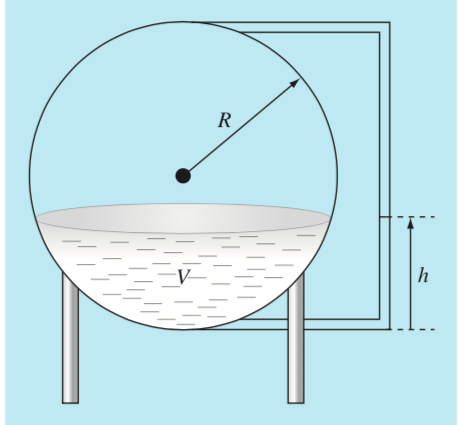

### Ejercicio Adicional 5


La energía térmica total de un dispositivo está dada por $E(t) = ((t + \frac{1}{3})3 +\frac{1}{3})e^{−t}$ para cada instante de tiempo $t$.

(a) Determinar los momentos en los que la energía del dispositivo es igual a 1.5.

(b) Determinar la máxima energía del sistema y en qué tiempo ocurre.

(c) Determinar el instante de tiempo en donde se da la máxima tasa de crecimiento instantánea de la energía.

### Problema Adicional 6


Resolver el siguiente sistema de ecuaciones con una precisión para el error absoluto de 10{-6}, utilizando el método de Newton:
$$ 6x - 2 cos(yz) = 1, \quad 9y + \sqrt{x^2 + sen(z) + 1.06} + 0.9 = 0, \quad 60z + 3e^{-xy} = 3 - 10 \pi.$$

### Problema Adicional 7

Una soga de longitud $L$ se encuentra atada a dos postes a una altura $h$, con sus centros separados entre sí una cierta distancia $2a$, como muestra la figura. Considerando un sistema de coordenadas cartesianas en el cual el eje $x$ se sitúa paralelo al suelo y el eje y se encuentra exactamente a igual distancia de ambos postes, se puede describir cada punto de la soga mediante la siguiente ecuación:
$$y(x) = \frac{1}{\gamma} (cosh (\gamma x) - cosh (\gamma a)) + h,$$

donde $x$, $y$, a están en metros, y $\gamma$ es un parámetro cuyo valor es
positivo y cumple la siguiente ecuación:
$$L = \frac{2}{\gamma} sinh (\gamma a).$$

(a) Si $L = 8 m$, $a = 3 m$ y $h = 2.5 m$, grafique los puntos de la soga y determine a qué altura se encuentra el punto más bajo de la misma.

(b) ¿A partir de qué distancia de separación entre postes la soga comienza a tocar el suelo? Calcule la distancia con un error menor a $1 mm$. Considere nuevamente $L = 8 m$ y $h = 2.5 m$.


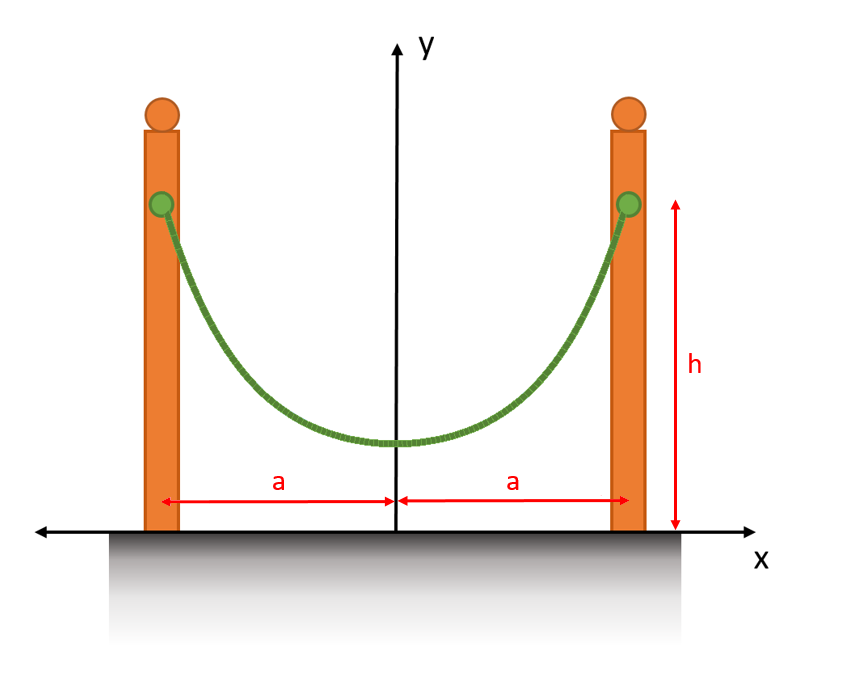